In [72]:
import os
import re
import glob
import math
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dask.dataframe as dd

In [2]:
pd.get_option("display.max_rows"), pd.get_option("display.max_columns")

(60, 20)

In [2]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)

In [8]:
files = glob.glob('assemblies/*/data.tsv')
files[:10]

['assemblies/Methyloligella/data.tsv',
 'assemblies/Xenorhabdus/data.tsv',
 'assemblies/Undibacterium/data.tsv',
 'assemblies/Mannheimia/data.tsv',
 'assemblies/Tenuifilum/data.tsv',
 'assemblies/Dyadobacter/data.tsv',
 'assemblies/Alloactinosynnema/data.tsv',
 'assemblies/Parolsenella/data.tsv',
 'assemblies/Rhodobacter/data.tsv',
 'assemblies/Limnobaculum/data.tsv']

In [9]:
dfs = [pd.read_csv(file, header=0, sep='\t') for file in files]

In [10]:
len(dfs)

1333

In [11]:
df = pd.concat(dfs).reset_index(drop=True)

In [13]:
df.head()

assembly_accession   bioproject     biosample wgs_master  \
0    GCF_013341275.1  PRJNA224116  SAMN15103857        NaN   
1    GCF_003575005.1  PRJNA224116  SAMN10053199        NaN   
2    GCF_014295015.1  PRJNA224116  SAMN15849948        NaN   
3    GCF_000973125.1  PRJNA224116  SAMEA3283115        NaN   
4    GCF_017743015.1  PRJNA224116  SAMN14595202        NaN   

  excluded_from_refseq        refseq_category relation_to_type_material  \
0                  NaN                     na                       NaN   
1                  NaN                     na                       NaN   
2                  NaN  representative genome                       NaN   
3                  NaN                     na                       NaN   
4                  NaN  representative genome                       NaN   

     taxid  species_taxid              organism_name infraspecific_name  \
0  2742204        2742204     Methyloligella sp. GL2         strain=GL2   
1      628            628    Xenorhabdus nematophila       strain=YL001   
2      628            628    Xenorhabdus nematophila         strain=SII   
3    40576          40576       Xenorhabdus bovienii        strain=CS03   
4   290110         290110  Xenorhabdus budapestensis       strain=C-7-2   

  isolate version_status   assembly_level release_type genome_rep  \
0     NaN         latest  Complete Genome        Major       Full   
1     NaN         latest  Complete Genome        Major       Full   
2     NaN         latest  Complete Genome        Major       Full   
3     NaN         latest  Complete Genome        Major       Full   
4     NaN         latest  Complete Genome        Major       Full   

  seq_rel_date      asm_name                                 submitter  \
0   2020/06/14  ASM1334127v1      Research Center of Biotechnology RAS   
1   2018/09/19   ASM357500v1                  Northwest A&F University   
2   2020/08/25  ASM1429501v1           Nanjing Agricultural University   
3   2015/02/06    ASM97312v1                             GENOSCOPE CEA   
4   2021/04/04  ASM1774301v1  Chinese Academy of Agricultural Sciences   

   gbrs_paired_asm paired_asm_comp  \
0  GCA_013341275.1       identical   
1  GCA_003575005.1       identical   
2  GCA_014295015.1       identical   
3  GCA_000973125.1       identical   
4  GCA_017743015.1       identical   

                                            ftp_path  \
0  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/013...   
1  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...   
2  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/014...   
3  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...   
4  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/017...   

                                      local_filename  
0  ./refseq/bacteria/GCF_013341275.1/GCF_01334127...  
1  ./refseq/bacteria/GCF_003575005.1/GCF_00357500...  
2  ./refseq/bacteria/GCF_014295015.1/GCF_01429501...  
3  ./refseq/bacteria/GCF_000973125.1/GCF_00097312...  
4  ./refseq/bacteria/GCF_017743015.1/GCF_01774301...

In [21]:
df.columns

Index(['assembly_accession', 'bioproject', 'biosample', 'wgs_master',
       'excluded_from_refseq', 'refseq_category', 'relation_to_type_material',
       'taxid', 'species_taxid', 'organism_name', 'infraspecific_name',
       'isolate', 'version_status', 'assembly_level', 'release_type',
       'genome_rep', 'seq_rel_date', 'asm_name', 'submitter',
       'gbrs_paired_asm', 'paired_asm_comp', 'ftp_path', 'local_filename'],
      dtype='object')

In [23]:
assembly = df[['taxid', 'assembly_accession', 'organism_name']]

In [24]:
assembly.shape

(24684, 3)

In [26]:
assembly.head()

taxid assembly_accession              organism_name
0  2742204    GCF_013341275.1     Methyloligella sp. GL2
1      628    GCF_003575005.1    Xenorhabdus nematophila
2      628    GCF_014295015.1    Xenorhabdus nematophila
3    40576    GCF_000973125.1       Xenorhabdus bovienii
4   290110    GCF_017743015.1  Xenorhabdus budapestensis

In [55]:
assembly.groupby('organism_name')['assembly_accession'].count()

organism_name
Acidiphilium cryptum JF-5                                   1
Acidiphilium multivorum AIU301                              1
Acidipropionibacterium acidipropionici                      6
Acidipropionibacterium acidipropionici ATCC 4875            1
Acidipropionibacterium jensenii                             4
                                                           ..
Zymomonas mobilis subsp. mobilis NCIMB 11163                1
Zymomonas mobilis subsp. mobilis NRRL B-12526               1
Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821           3
Zymomonas mobilis subsp. mobilis str. CP4 = NRRL B-14023    2
Zymomonas mobilis subsp. pomaceae ATCC 29192                1
Name: assembly_accession, Length: 9803, dtype: int64

In [30]:
pd.merge(df_cls, assembly, on='taxid')

taxid superkingdom          phylum                class  \
0      2742204     Bacteria  Proteobacteria  Alphaproteobacteria   
1          628     Bacteria  Proteobacteria  Gammaproteobacteria   
2          628     Bacteria  Proteobacteria  Gammaproteobacteria   
3        40576     Bacteria  Proteobacteria  Gammaproteobacteria   
4       290110     Bacteria  Proteobacteria  Gammaproteobacteria   
...        ...          ...             ...                  ...   
24679  2576903     Bacteria   Cyanobacteria                  NaN   
24680  2576904     Bacteria   Cyanobacteria                  NaN   
24681  2653204     Bacteria   Cyanobacteria                  NaN   
24682  2814655     Bacteria   Cyanobacteria                  NaN   
24683    33074     Bacteria  Proteobacteria  Gammaproteobacteria   

                   order             family           genus  \
0       Hyphomicrobiales  Hyphomicrobiaceae  Methyloligella   
1       Enterobacterales     Morganellaceae     Xenorhabdus   
2       Enterobacterales     Morganellaceae     Xenorhabdus   
3       Enterobacterales     Morganellaceae     Xenorhabdus   
4       Enterobacterales     Morganellaceae     Xenorhabdus   
...                  ...                ...             ...   
24679         Nostocales        Nostocaceae          Nostoc   
24680         Nostocales        Nostocaceae          Nostoc   
24681         Nostocales        Nostocaceae          Nostoc   
24682         Nostocales        Nostocaceae          Nostoc   
24683  Oceanospirillales     Halomonadaceae      Zymobacter   

                 organism_name_x                    no_rank  \
0         Methyloligella sp. GL2                        NaN   
1        Xenorhabdus nematophila                        NaN   
2        Xenorhabdus nematophila                        NaN   
3           Xenorhabdus bovienii                        NaN   
4      Xenorhabdus budapestensis                        NaN   
...                          ...                        ...   
24679            Nostoc sp. C057                        NaN   
24680        Nostoc sp. TCL26-01                        NaN   
24681         Nostoc sphaeroides  Nostoc sphaeroides CCNUC1   
24682       Nostoc sp. UHCC 0702                        NaN   
24683          Zymobacter palmae                        NaN   

      assembly_accession            organism_name_y  
0        GCF_013341275.1     Methyloligella sp. GL2  
1        GCF_003575005.1    Xenorhabdus nematophila  
2        GCF_014295015.1    Xenorhabdus nematophila  
3        GCF_000973125.1       Xenorhabdus bovienii  
4        GCF_017743015.1  Xenorhabdus budapestensis  
...                  ...                        ...  
24679    GCF_013393925.1            Nostoc sp. C057  
24680    GCF_013393945.1        Nostoc sp. TCL26-01  
24681    GCF_009372195.1  Nostoc sphaeroides CCNUC1  
24682    GCF_017164015.1       Nostoc sp. UHCC 0702  
24683    GCF_003610015.1          Zymobacter palmae  

[24684 rows x 11 columns]

In [3]:
df_cls = pd.read_csv('Baterial_info/species_from_taxids', sep=";", header=None)

In [4]:
df_cls.rename(columns={0: "taxid", 
                       1: "superkingdom", 
                       2: "phylum", 
                       3: "class", 
                       4: "order", 
                       5: "family", 
                       6: "genus", 
                       7: "organism_name", 
                       8: "no_rank"}, inplace=True)

In [20]:
df_cls.shape

(9803, 9)

In [6]:
df_cls.head()

taxid superkingdom          phylum                class  \
0  2742204     Bacteria  Proteobacteria  Alphaproteobacteria   
1      628     Bacteria  Proteobacteria  Gammaproteobacteria   
2    40576     Bacteria  Proteobacteria  Gammaproteobacteria   
3   290110     Bacteria  Proteobacteria  Gammaproteobacteria   
4   351671     Bacteria  Proteobacteria  Gammaproteobacteria   

              order             family           genus  \
0  Hyphomicrobiales  Hyphomicrobiaceae  Methyloligella   
1  Enterobacterales     Morganellaceae     Xenorhabdus   
2  Enterobacterales     Morganellaceae     Xenorhabdus   
3  Enterobacterales     Morganellaceae     Xenorhabdus   
4  Enterobacterales     Morganellaceae     Xenorhabdus   

               organism_name no_rank  
0     Methyloligella sp. GL2     NaN  
1    Xenorhabdus nematophila     NaN  
2       Xenorhabdus bovienii     NaN  
3  Xenorhabdus budapestensis     NaN  
4      Xenorhabdus doucetiae     NaN

In [168]:
202462 in df_cls['taxid'], 202462 in df['taxid']

(False, False)

In [7]:
df_cls.groupby('phylum').agg(sum)['taxid']

phylum
Acidobacteria                    47874543
Actinobacteria                 1888132350
Aquificae                         9710743
Armatimonadetes                   1964996
Bacteroidetes                   804671194
Balneolaeota                      1457365
Caldiserica                        511051
Calditrichaeota                    880073
Candidatus Bipolaricaulota        2026885
Candidatus Cloacimonetes           459349
Candidatus Omnitrophica           1930593
Candidatus Saccharibacteria       3426012
Chlamydiae                      119286682
Chlorobi                          8106003
Chloroflexi                      34221782
Chrysiogenetes                     653733
Coprothermobacterota               309798
Cyanobacteria                   256706980
Deferribacteres                   2787393
Deinococcus-Thermus              35649068
Dictyoglomi                        825434
Elusimicrobia                     3262417
Fibrobacteres                       59374
Firmicutes                 

In [32]:
taxid_grouped = pd.merge(assembly, df_cls, on='taxid')

In [39]:
taxid_grouped = taxid_grouped.drop('organism_name_y', 
                                   axis=1).rename(columns={'organism_name_x': 'organism_name'})

In [40]:
taxid_grouped.to_csv('Baterial_info/Grouped_by_taxid.csv')

In [63]:
taxid_grouped

taxid assembly_accession              organism_name superkingdom  \
0      2742204    GCF_013341275.1     Methyloligella sp. GL2     Bacteria   
1          628    GCF_003575005.1    Xenorhabdus nematophila     Bacteria   
2          628    GCF_014295015.1    Xenorhabdus nematophila     Bacteria   
3        40576    GCF_000973125.1       Xenorhabdus bovienii     Bacteria   
4       290110    GCF_017743015.1  Xenorhabdus budapestensis     Bacteria   
...        ...                ...                        ...          ...   
24679  2576903    GCF_013393925.1            Nostoc sp. C057     Bacteria   
24680  2576904    GCF_013393945.1        Nostoc sp. TCL26-01     Bacteria   
24681  2653204    GCF_009372195.1  Nostoc sphaeroides CCNUC1     Bacteria   
24682  2814655    GCF_017164015.1       Nostoc sp. UHCC 0702     Bacteria   
24683    33074    GCF_003610015.1          Zymobacter palmae     Bacteria   

               phylum                class              order  \
0      Proteobacteria  Alphaproteobacteria   Hyphomicrobiales   
1      Proteobacteria  Gammaproteobacteria   Enterobacterales   
2      Proteobacteria  Gammaproteobacteria   Enterobacterales   
3      Proteobacteria  Gammaproteobacteria   Enterobacterales   
4      Proteobacteria  Gammaproteobacteria   Enterobacterales   
...               ...                  ...                ...   
24679   Cyanobacteria                  NaN         Nostocales   
24680   Cyanobacteria                  NaN         Nostocales   
24681   Cyanobacteria                  NaN         Nostocales   
24682   Cyanobacteria                  NaN         Nostocales   
24683  Proteobacteria  Gammaproteobacteria  Oceanospirillales   

                  family           genus                    no_rank  
0      Hyphomicrobiaceae  Methyloligella                        NaN  
1         Morganellaceae     Xenorhabdus                        NaN  
2         Morganellaceae     Xenorhabdus                        NaN  
3         Morganellaceae     Xenorhabdus                        NaN  
4         Morganellaceae     Xenorhabdus                        NaN  
...                  ...             ...                        ...  
24679        Nostocaceae          Nostoc                        NaN  
24680        Nostocaceae          Nostoc                        NaN  
24681        Nostocaceae          Nostoc  Nostoc sphaeroides CCNUC1  
24682        Nostocaceae          Nostoc                        NaN  
24683     Halomonadaceae      Zymobacter                        NaN  

[24684 rows x 10 columns]

In [45]:
taxid_grouped.isnull().sum()

taxid                     0
assembly_accession        0
organism_name             0
superkingdom              0
phylum                    2
class                   250
order                    59
family                  148
genus                    57
no_rank               19183
dtype: int64

In [69]:
number_assemblies_genus = taxid_grouped.groupby('genus')['assembly_accession'].count()

In [137]:
taxid_grouped.set_index('taxid')

assembly_accession              organism_name superkingdom  \
taxid                                                                
2742204    GCF_013341275.1     Methyloligella sp. GL2     Bacteria   
628        GCF_003575005.1    Xenorhabdus nematophila     Bacteria   
628        GCF_014295015.1    Xenorhabdus nematophila     Bacteria   
40576      GCF_000973125.1       Xenorhabdus bovienii     Bacteria   
290110     GCF_017743015.1  Xenorhabdus budapestensis     Bacteria   
...                    ...                        ...          ...   
2576903    GCF_013393925.1            Nostoc sp. C057     Bacteria   
2576904    GCF_013393945.1        Nostoc sp. TCL26-01     Bacteria   
2653204    GCF_009372195.1  Nostoc sphaeroides CCNUC1     Bacteria   
2814655    GCF_017164015.1       Nostoc sp. UHCC 0702     Bacteria   
33074      GCF_003610015.1          Zymobacter palmae     Bacteria   

                 phylum                class              order  \
taxid                                                             
2742204  Proteobacteria  Alphaproteobacteria   Hyphomicrobiales   
628      Proteobacteria  Gammaproteobacteria   Enterobacterales   
628      Proteobacteria  Gammaproteobacteria   Enterobacterales   
40576    Proteobacteria  Gammaproteobacteria   Enterobacterales   
290110   Proteobacteria  Gammaproteobacteria   Enterobacterales   
...                 ...                  ...                ...   
2576903   Cyanobacteria                  NaN         Nostocales   
2576904   Cyanobacteria                  NaN         Nostocales   
2653204   Cyanobacteria                  NaN         Nostocales   
2814655   Cyanobacteria                  NaN         Nostocales   
33074    Proteobacteria  Gammaproteobacteria  Oceanospirillales   

                    family           genus                    no_rank  
taxid                                                                  
2742204  Hyphomicrobiaceae  Methyloligella                        NaN  
628         Morganellaceae     Xenorhabdus                        NaN  
628         Morganellaceae     Xenorhabdus                        NaN  
40576       Morganellaceae     Xenorhabdus                        NaN  
290110      Morganellaceae     Xenorhabdus                        NaN  
...                    ...             ...                        ...  
2576903        Nostocaceae          Nostoc                        NaN  
2576904        Nostocaceae          Nostoc                        NaN  
2653204        Nostocaceae          Nostoc  Nostoc sphaeroides CCNUC1  
2814655        Nostocaceae          Nostoc                        NaN  
33074       Halomonadaceae      Zymobacter                        NaN  

[24684 rows x 9 columns]

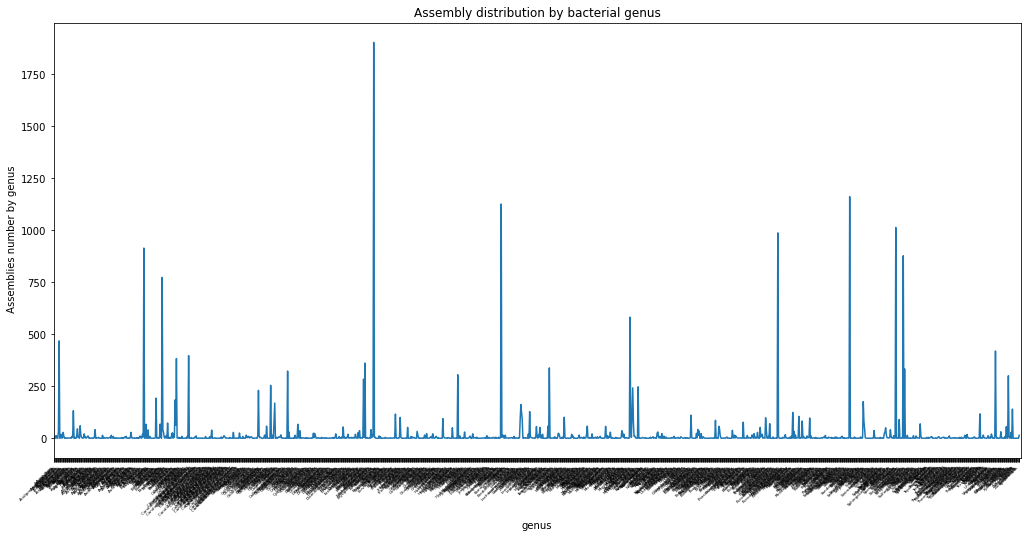

In [110]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(number_assemblies_genus)
plt.xlabel('genus', fontsize=10)
plt.ylabel(' Assemblies number by genus')
plt.title('Assembly distribution by bacterial genus')
plt.xlim(0, number_assemblies_genus.shape[0] + 1)
plt.tight_layout()
plt.xticks(labels, fontsize=4, rotation=45, ha="right")
plt.show();

In [123]:
x = [i for i in range(number_assemblies_genus.shape[0])]
y = number_assemblies_genus.values

In [129]:
len(x), len(y), max(y)

(1425, 1425, 1904)

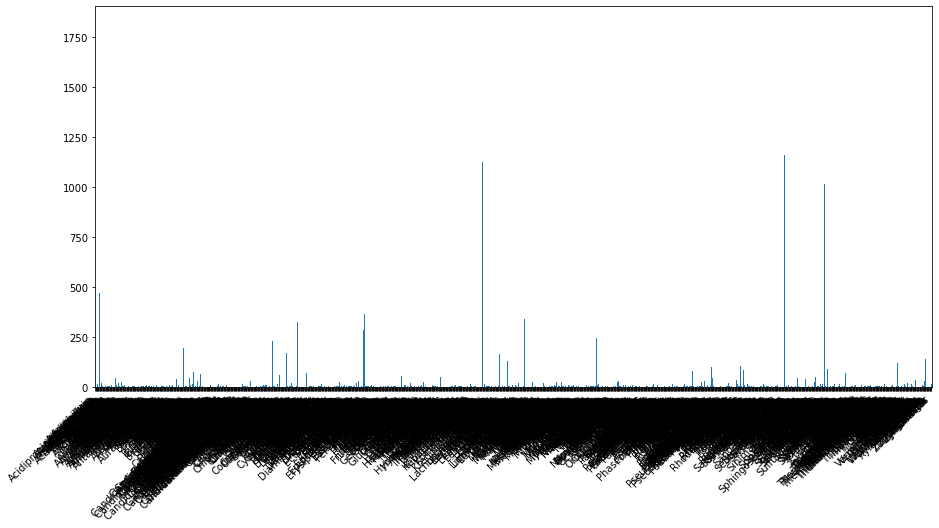

In [133]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(number_assemblies_genus.index, y)
plt.xlim(0, number_assemblies_genus.shape[0])
plt.ylim(0, max(y))
plt.xticks(rotation=45, ha="right")
plt.show();

In [146]:
fam_assm = taxid_grouped.groupby('family')['assembly_accession'].count()  #.groupby('taxid_grouped')['organism_name'].count()

In [153]:
assm_phylum = taxid_grouped.groupby('phylum')['assembly_accession'].count().sort_values()

In [160]:
# Standard plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [161]:
assm_phylum.iplot(kind='hist', xTitle='assemblies',
                  yTitle='count', title='Assembly Distribution by phylum')

In [162]:
taxid_grouped.head()

taxid assembly_accession              organism_name superkingdom  \
0  2742204    GCF_013341275.1     Methyloligella sp. GL2     Bacteria   
1      628    GCF_003575005.1    Xenorhabdus nematophila     Bacteria   
2      628    GCF_014295015.1    Xenorhabdus nematophila     Bacteria   
3    40576    GCF_000973125.1       Xenorhabdus bovienii     Bacteria   
4   290110    GCF_017743015.1  Xenorhabdus budapestensis     Bacteria   

           phylum                class             order             family  \
0  Proteobacteria  Alphaproteobacteria  Hyphomicrobiales  Hyphomicrobiaceae   
1  Proteobacteria  Gammaproteobacteria  Enterobacterales     Morganellaceae   
2  Proteobacteria  Gammaproteobacteria  Enterobacterales     Morganellaceae   
3  Proteobacteria  Gammaproteobacteria  Enterobacterales     Morganellaceae   
4  Proteobacteria  Gammaproteobacteria  Enterobacterales     Morganellaceae   

            genus no_rank  
0  Methyloligella     NaN  
1     Xenorhabdus     NaN  
2     Xenorhabdus     NaN  
3     Xenorhabdus     NaN  
4     Xenorhabdus     NaN

In [166]:
taxid_grouped[['assembly_accession']].iplot(
    kind='hist',
    xTitle='Assemblies by genus',
    yTitle='(%) assemblies',
    title='Assembly Distribution by genus')

In [70]:
total_number_assemblies = number_assemblies.sum()

In [62]:
number_spcs = taxid_grouped.groupby('family')['organism_name'].count()

In [152]:
df_cls.to_csv('taxid_assemblies_data_taxonkit.csv')

In [146]:
merged = pd.merge(df, df_cls, on=['taxid', 'organism_name'])

In [157]:
len(merged['genus'].unique())

1144

In [158]:
genus = list(merged['genus'].unique())

In [162]:
lst_genus = []
with open('Baterial_info/my_genera_list.txt', 'r') as fh:
    for line in fh:
        lst_genus.append(line.strip())

In [166]:
set(genus).difference(set(lst_genus))

{'Aquiluna',
 'Candidatus Annandia',
 'Candidatus Arthromitus',
 'Candidatus Azoamicus',
 'Candidatus Babela',
 'Candidatus Bipolaricaulis',
 'Candidatus Blochmannia',
 'Candidatus Cardinium',
 'Candidatus Carsonella',
 'Candidatus Chazhemtobacterium',
 'Candidatus Cyclonatronum',
 'Candidatus Cytomitobacter',
 'Candidatus Deianiraea',
 'Candidatus Desulfofervidus',
 'Candidatus Desulforudis',
 'Candidatus Doolittlea',
 'Candidatus Fokinia',
 'Candidatus Fonsibacter',
 'Candidatus Fukatsuia',
 'Candidatus Gullanella',
 'Candidatus Hamiltonella',
 'Candidatus Hoaglandella',
 'Candidatus Hodgkinia',
 'Candidatus Izimaplasma',
 'Candidatus Kinetoplastibacterium',
 'Candidatus Kuenenia',
 'Candidatus Methylopumilus',
 'Candidatus Methylospira',
 'Candidatus Mikella',
 'Candidatus Nanopelagicus',
 'Candidatus Nanosynbacter',
 'Candidatus Nardonella',
 'Candidatus Nesciobacter',
 'Candidatus Nitrosacidococcus',
 'Candidatus Nitrosoglobus',
 'Candidatus Nitrotoga',
 'Candidatus Paracaedibacte

In [172]:
with open('Baterial_info/list_chr_files', 'r') as fh:
    for line in fh:
        print(line.strip())

Acidiphilium/Cromosomes:
GCF_000016725.1_chr.fna
GCF_000202835.1_chr.fna

Acidipropionibacterium/Cromosomes:
GCF_000310065.1_chr.fna
GCF_001441165.1_chr.fna
GCF_001602115.1_chr.fna
GCF_001855335.1_chr.fna
GCF_001975205.1_chr.fna
GCF_003325455.1_chr.fna
GCF_003956085.1_chr.fna
GCF_004011055.1_chr.fna
GCF_004011075.1_chr.fna
GCF_005890135.1_chr.fna
GCF_005890155.1_chr.fna
GCF_900637925.1_chr.fna

Acidisarcina/Cromosomes:
GCF_003330725.1_chr.fna

Acidithiobacillus/Cromosomes:
GCF_000020825.1_chr.fna
GCF_000021485.1_chr.fna
GCF_000175575.2_chr.fna
GCF_000214095.2_chr.fna
GCF_000221025.1_chr.fna
GCF_001650235.3_chr.fna
GCF_003966655.1_chr.fna
GCF_008694225.1_chr.fna
GCF_008926505.1_chr.fna
GCF_009662475.1_chr.fna
GCF_013462805.1_chr.fna
GCF_016250455.1_chr.fna
GCF_900174455.1_chr.fna

Acidobacterium/Cromosomes:
GCF_000022565.1_chr.fna
GCF_014274465.1_chr.fna

Acidothermus/Cromosomes:
GCF_000015025.1_chr.fna

Acidovorax/Cromosomes:
GCF_000015325.1_chr.fna
GCF_000015545.1_chr.fna
GCF_00002230

GCF_016894205.1_chr.fna
GCF_018279805.1_chr.fna
GCF_018289035.1_chr.fna
GCF_018289135.1_chr.fna
GCF_018289175.1_chr.fna
GCF_018289275.1_chr.fna
GCF_018289295.1_chr.fna
GCF_018289375.1_chr.fna
GCF_018291785.1_chr.fna
GCF_018291825.1_chr.fna
GCF_018291945.1_chr.fna
GCF_018292045.1_chr.fna
GCF_018292125.1_chr.fna
GCF_018292165.1_chr.fna
GCF_018292185.1_chr.fna
GCF_018292205.1_chr.fna
GCF_900095495.1_chr.fna

Baekduia/Cromosomes:
GCF_007970665.1_chr.fna

Barnesiella/Cromosomes:
GCF_000512915.1_chr.fna

Bartonella/Cromosomes:
GCF_000015445.1_chr.fna
GCF_000022725.1_chr.fna
GCF_000046685.1_chr.fna
GCF_000046705.1_chr.fna
GCF_000196435.1_chr.fna
GCF_000253015.1_chr.fna
GCF_000273375.1_chr.fna
GCF_000294715.1_chr.fna
GCF_000341355.1_chr.fna
GCF_000341385.1_chr.fna
GCF_000384965.1_chr.fna
GCF_000612765.1_chr.fna
GCF_000612965.1_chr.fna
GCF_000689355.1_chr.fna
GCF_001281405.1_chr.fna
GCF_001291465.1_chr.fna
GCF_001559035.2_chr.fna
GCF_002007485.1_chr.fna
GCF_002007505.1_chr.fna
GCF_002007565.1_c

GCF_000092685.1_chr.fna
GCF_000092705.1_chr.fna
GCF_000092725.1_chr.fna
GCF_000092745.1_chr.fna
GCF_000092805.1_chr.fna
GCF_000093005.1_chr.fna
GCF_000173475.1_chr.fna
GCF_000173495.1_chr.fna
GCF_000173515.1_chr.fna
GCF_000173535.1_chr.fna
GCF_000174055.1_chr.fna
GCF_000175515.1_chr.fna
GCF_000175535.1_chr.fna
GCF_000191925.1_chr.fna
GCF_000204135.1_chr.fna
GCF_000204255.1_chr.fna
GCF_000210495.1_chr.fna
GCF_000211155.1_chr.fna
GCF_000213905.2_chr.fna
GCF_000220105.1_chr.fna
GCF_000226605.1_chr.fna
GCF_000270385.1_chr.fna
GCF_000270405.1_chr.fna
GCF_000270425.1_chr.fna
GCF_000270445.1_chr.fna
GCF_000284475.1_chr.fna
GCF_000298415.1_chr.fna
GCF_000298435.2_chr.fna
GCF_000298475.2_chr.fna
GCF_000298495.2_chr.fna
GCF_000298515.2_chr.fna
GCF_000298555.2_chr.fna
GCF_000304495.1_chr.fna
GCF_000304515.1_chr.fna
GCF_000304535.1_chr.fna
GCF_000317995.1_chr.fna
GCF_000318525.1_chr.fna
GCF_000318545.1_chr.fna
GCF_000318565.1_chr.fna
GCF_000318585.1_chr.fna
GCF_000318605.1_chr.fna
GCF_000318625.1_

GCF_011193375.1_chr.fna
GCF_011397115.1_chr.fna
GCF_011745645.1_chr.fna
GCF_012045365.1_chr.fna
GCF_012045505.1_chr.fna
GCF_012222705.1_chr.fna
GCF_012594215.1_chr.fna
GCF_012932975.2_chr.fna
GCF_012932985.2_chr.fna
GCF_012933055.2_chr.fna
GCF_012933075.2_chr.fna
GCF_012933165.2_chr.fna
GCF_012933195.2_chr.fna
GCF_012933245.2_chr.fna
GCF_012933265.2_chr.fna
GCF_012933285.2_chr.fna
GCF_012933295.2_chr.fna
GCF_012933345.2_chr.fna
GCF_013201055.1_chr.fna
GCF_013344605.1_chr.fna
GCF_013344625.1_chr.fna
GCF_013344645.1_chr.fna
GCF_013344665.1_chr.fna
GCF_013391145.1_chr.fna
GCF_013391165.1_chr.fna
GCF_013391185.1_chr.fna
GCF_013391205.1_chr.fna
GCF_013394305.1_chr.fna
GCF_013394325.1_chr.fna
GCF_014218175.1_chr.fna
GCF_014489455.1_chr.fna
GCF_014489995.1_chr.fna
GCF_014490015.1_chr.fna
GCF_014844195.1_chr.fna
GCF_014844215.1_chr.fna
GCF_014844235.1_chr.fna
GCF_014874615.1_chr.fna
GCF_014893535.1_chr.fna
GCF_015325925.1_chr.fna
GCF_015377745.1_chr.fna
GCF_015377765.1_chr.fna
GCF_015476295.1_

GCF_003351585.1_chr.fna
GCF_003351605.1_chr.fna
GCF_003351625.1_chr.fna
GCF_003352345.1_chr.fna
GCF_003352365.1_chr.fna
GCF_003352385.1_chr.fna
GCF_003352405.1_chr.fna
GCF_003390455.1_chr.fna
GCF_003425445.1_chr.fna
GCF_003425465.1_chr.fna
GCF_003425485.1_chr.fna
GCF_003425505.1_chr.fna
GCF_003425525.1_chr.fna
GCF_003425565.1_chr.fna
GCF_003425585.1_chr.fna
GCF_003425605.1_chr.fna
GCF_003425625.1_chr.fna
GCF_003425645.1_chr.fna
GCF_003425715.1_chr.fna
GCF_003425765.1_chr.fna
GCF_003425815.1_chr.fna
GCF_003425935.1_chr.fna
GCF_003425955.1_chr.fna
GCF_003691635.1_chr.fna
GCF_003691655.1_chr.fna
GCF_004104465.2_chr.fna
GCF_008330025.1_chr.fna
GCF_008586745.1_chr.fna
GCF_008586805.1_chr.fna
GCF_008586825.1_chr.fna
GCF_008831525.1_chr.fna
GCF_013394405.1_chr.fna
GCF_014701215.1_chr.fna
GCF_014931275.1_chr.fna
GCF_014931295.1_chr.fna
GCF_014931315.1_chr.fna
GCF_014931335.1_chr.fna
GCF_014931355.1_chr.fna
GCF_014931375.1_chr.fna
GCF_014931395.1_chr.fna
GCF_014931415.1_chr.fna
GCF_014931435.1_

GCF_900478135.1_chr.fna
GCF_902386615.1_chr.fna

Lentibacillus/Cromosomes:
GCF_001307805.1_chr.fna
GCF_013373365.1_chr.fna

Lentilitoribacter/Cromosomes:
GCF_900537175.1_chr.fna

Lentzea/Cromosomes:
GCF_001701025.1_chr.fna

Leptolyngbya/Cromosomes:
GCF_000316605.1_chr.fna
GCF_001548395.1_chr.fna
GCF_001548435.1_chr.fna
GCF_002142475.1_chr.fna
GCF_002142495.1_chr.fna
GCF_002368255.1_chr.fna
GCF_016403105.1_chr.fna
GCF_018128485.1_chr.fna
GCF_018128505.1_chr.fna

Leptospira/Cromosomes:
GCF_000007685.1_chr.fna
GCF_000017605.1_chr.fna
GCF_000017685.1_chr.fna
GCF_000092565.1_chr.fna
GCF_000231175.1_chr.fna
GCF_000306675.2_chr.fna
GCF_000313175.2_chr.fna
GCF_000941035.1_chr.fna
GCF_000988105.2_chr.fna
GCF_001008325.2_chr.fna
GCF_001008335.2_chr.fna
GCF_001010765.1_chr.fna
GCF_001047635.1_chr.fna
GCF_001047655.1_chr.fna
GCF_001293065.1_chr.fna
GCF_001443305.1_chr.fna
GCF_001729245.1_chr.fna
GCF_002073495.2_chr.fna
GCF_002287705.1_chr.fna
GCF_003429485.1_chr.fna
GCF_003429505.1_chr.fna
GCF_003

GCF_002073575.2_chr.fna
GCF_002073595.2_chr.fna
GCF_002073615.2_chr.fna
GCF_002073655.2_chr.fna
GCF_002073675.2_chr.fna
GCF_002073715.2_chr.fna
GCF_002075815.1_chr.fna
GCF_002216145.1_chr.fna
GCF_002237445.1_chr.fna
GCF_002327085.1_chr.fna
GCF_002556585.1_chr.fna
GCF_002556605.1_chr.fna
GCF_002951575.1_chr.fna
GCF_003351545.1_chr.fna
GCF_003351565.1_chr.fna
GCF_003351665.1_chr.fna
GCF_003351685.1_chr.fna
GCF_003355195.1_chr.fna
GCF_003355215.1_chr.fna
GCF_003355235.1_chr.fna
GCF_003355255.1_chr.fna
GCF_003355275.1_chr.fna
GCF_003355295.1_chr.fna
GCF_003355315.1_chr.fna
GCF_003355335.1_chr.fna
GCF_003355355.1_chr.fna
GCF_003355375.1_chr.fna
GCF_003355395.1_chr.fna
GCF_003355415.1_chr.fna
GCF_003355435.1_chr.fna
GCF_003571445.1_chr.fna
GCF_003571465.1_chr.fna
GCF_003855175.1_chr.fna
GCF_003855195.1_chr.fna
GCF_003855215.1_chr.fna
GCF_003855235.1_chr.fna
GCF_003855295.1_chr.fna
GCF_003855355.1_chr.fna
GCF_003855375.1_chr.fna
GCF_003855415.1_chr.fna
GCF_003855435.1_chr.fna
GCF_004001105.1_

GCF_013394475.2_chr.fna
GCF_013395035.1_chr.fna
GCF_013395055.1_chr.fna
GCF_013401475.1_chr.fna
GCF_013403585.1_chr.fna
GCF_013407925.2_chr.fna
GCF_013409125.2_chr.fna
GCF_013409685.2_chr.fna
GCF_013410155.2_chr.fna
GCF_013414905.1_chr.fna
GCF_013414925.1_chr.fna
GCF_013414945.1_chr.fna
GCF_013414965.1_chr.fna
GCF_013414985.1_chr.fna
GCF_013415005.1_chr.fna
GCF_013415025.1_chr.fna
GCF_013415045.1_chr.fna
GCF_013415065.1_chr.fna
GCF_013415085.1_chr.fna
GCF_013425825.1_chr.fna
GCF_013466605.1_chr.fna
GCF_013467585.1_chr.fna
GCF_013467605.1_chr.fna
GCF_014076455.1_chr.fna
GCF_014076515.1_chr.fna
GCF_014109765.1_chr.fna
GCF_014109785.1_chr.fna
GCF_014117365.1_chr.fna
GCF_014155905.1_chr.fna
GCF_014161995.1_chr.fna
GCF_014162535.1_chr.fna
GCF_014169055.1_chr.fna
GCF_014217315.1_chr.fna
GCF_014217705.1_chr.fna
GCF_014467035.1_chr.fna
GCF_014490645.1_chr.fna
GCF_014522265.1_chr.fna
GCF_014524625.1_chr.fna
GCF_014524645.1_chr.fna
GCF_014706535.1_chr.fna
GCF_014726755.1_chr.fna
GCF_014764425.1_

GCF_002209245.2_chr.fna
GCF_002215585.1_chr.fna
GCF_002216875.1_chr.fna
GCF_002838165.1_chr.fna
GCF_002966515.1_chr.fna
GCF_003030925.1_chr.fna
GCF_003044255.1_chr.fna
GCF_003052765.1_chr.fna
GCF_003721455.1_chr.fna
GCF_003855155.1_chr.fna
GCF_003855395.1_chr.fna
GCF_003957745.1_chr.fna
GCF_004295345.1_chr.fna
GCF_004354305.1_chr.fna
GCF_005234075.1_chr.fna
GCF_006385555.1_chr.fna
GCF_006385735.2_chr.fna
GCF_006494715.1_chr.fna
GCF_006494755.1_chr.fna
GCF_007004545.2_chr.fna
GCF_007197555.1_chr.fna
GCF_007567505.1_chr.fna
GCF_007923045.1_chr.fna
GCF_009183365.2_chr.fna
GCF_009372175.1_chr.fna
GCF_009730575.1_chr.fna
GCF_009730655.1_chr.fna
GCF_009846595.1_chr.fna
GCF_010092445.1_chr.fna
GCF_011106835.1_chr.fna
GCF_011765625.1_chr.fna
GCF_013267215.1_chr.fna
GCF_013394145.1_chr.fna
GCF_014263185.1_chr.fna
GCF_014702225.1_chr.fna
GCF_014840975.1_chr.fna
GCF_016406305.1_chr.fna
GCF_016406325.1_chr.fna
GCF_016757755.1_chr.fna
GCF_016834455.1_chr.fna
GCF_016859145.1_chr.fna
GCF_017068195.1_

GCF_016747875.1_chr.fna

Suicoccus/Cromosomes:
GCF_003546865.1_chr.fna

Sulfitobacter/Cromosomes:
GCF_001886735.1_chr.fna
GCF_002222635.1_chr.fna
GCF_003352045.1_chr.fna
GCF_003352065.1_chr.fna
GCF_003352085.1_chr.fna
GCF_003352105.1_chr.fna
GCF_003611275.1_chr.fna
GCF_006064855.1_chr.fna
GCF_009363555.1_chr.fna
GCF_013347125.1_chr.fna
GCF_013487745.1_chr.fna
GCF_015871245.1_chr.fna
GCF_016801755.1_chr.fna
GCF_016801775.1_chr.fna
GCF_018200035.1_chr.fna

Sulfuricaulis/Cromosomes:
GCF_002355735.1_chr.fna

Sulfuricella/Cromosomes:
GCF_000297055.2_chr.fna

Sulfuricurvum/Cromosomes:
GCF_000183725.1_chr.fna

Sulfuriferula/Cromosomes:
GCF_002162035.1_chr.fna
GCF_009937995.1_chr.fna
GCF_009938015.1_chr.fna

Sulfuriflexus/Cromosomes:
GCF_003967195.1_chr.fna

Sulfurifustis/Cromosomes:
GCF_002355415.1_chr.fna

Sulfurihydrogenibium/Cromosomes:
GCF_000020325.1_chr.fna
GCF_000021545.1_chr.fna

Sulfurimicrobium/Cromosomes:
GCF_011764585.1_chr.fna

Sulfurimonas/Cromosomes:
GCF_000012965.1_chr.fna
GCF

codigo para fazer o split qdo ha muito mais que 1 spaço na string
re.split(r'\s+', line) == line.split()

In [124]:
with open('Baterial_info/species_from_taxids', 'r') as fh:
    for line in fh:
        print(line)

2742204	Bacteria;Proteobacteria;Alphaproteobacteria;Hyphomicrobiales;Hyphomicrobiaceae;Methyloligella;Methyloligella sp. GL2;

628	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Xenorhabdus;Xenorhabdus nematophila;

40576	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Xenorhabdus;Xenorhabdus bovienii;

290110	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Xenorhabdus;Xenorhabdus budapestensis;

351671	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Xenorhabdus;Xenorhabdus doucetiae;

351679	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Xenorhabdus;Xenorhabdus hominickii;

406817	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Xenorhabdus;Xenorhabdus nematophila;Xenorhabdus nematophila ATCC 19061

406818	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Xenorhabdus;Xenorhabdus bovienii;Xenor

712898	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea vagans;Pantoea vagans C9-1

932677	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea ananatis;Pantoea ananatis AJ13355

1076550	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea rwandensis;

1095774	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea ananatis;Pantoea ananatis PA13

1123863	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea ananatis;Pantoea ananatis LMG 5342

1484158	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea sp. PSNIH1;

1891675	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea alhagi;

2052056	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea sp. MSR2;

2479547	Bacteria;Proteobacteria;Gammaproteobacter

2518976	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Buchnera;Buchnera aphidicola;

2518977	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Buchnera;Buchnera aphidicola;

2518979	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Buchnera;Buchnera aphidicola;

2518980	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Buchnera;Buchnera aphidicola;

2559115	Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Buchnera;Buchnera aphidicola;

39488	Bacteria;Firmicutes;Clostridia;Eubacteriales;Lachnospiraceae;Anaerobutyricum;Anaerobutyricum hallii;

537	Bacteria;Proteobacteria;Betaproteobacteria;Neisseriales;Chromobacteriaceae;Iodobacter;Iodobacter fluviatilis;

2496266	Bacteria;Proteobacteria;Betaproteobacteria;Neisseriales;Chromobacteriaceae;Iodobacter;Iodobacter sp. H11R3;

224324	Bacteria;Aquificae;Aquificae;Aquificales;Aquificaceae;Aquifex;Aquifex aeolicus;Aquifex aeolic

765874	Bacteria;Actinobacteria;Actinomycetia;Corynebacteriales;Corynebacteriaceae;Corynebacterium;Corynebacterium pseudotuberculosis;Corynebacterium pseudotuberculosis FRC41

858619	Bacteria;Actinobacteria;Actinomycetia;Corynebacteriales;Corynebacteriaceae;Corynebacterium;Corynebacterium variabile;Corynebacterium variabile DSM 44702

863239	Bacteria;Actinobacteria;Actinomycetia;Corynebacteriales;Corynebacteriaceae;Corynebacterium;Corynebacterium nuruki;Corynebacterium nuruki S6-4

889513	Bacteria;Actinobacteria;Actinomycetia;Corynebacteriales;Corynebacteriaceae;Corynebacterium;Corynebacterium pseudotuberculosis;Corynebacterium pseudotuberculosis I19

931089	Bacteria;Actinobacteria;Actinomycetia;Corynebacteriales;Corynebacteriaceae;Corynebacterium;Corynebacterium deserti;Corynebacterium deserti GIMN1.010

935298	Bacteria;Actinobacteria;Actinomycetia;Corynebacteriales;Corynebacteriaceae;Corynebacterium;Corynebacterium pseudotuberculosis;Corynebacterium pseudotuberculosis PAT10

935697	Ba

In [3]:
# [ ('A','C','T','G').index(char) for char in 'ACGCCATGG' ]

[0, 1, 3, 1, 1, 0, 2, 3, 3]

In [103]:
def _ecdf(x):
    nobs = len(x)
    return np.arange(1,nobs+1)/float(nobs)

In [104]:
_ecdf([0, 1, 3, 1, 1, 0, 2, 3, 3])

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ])

In [ ]:
# def get_name_file_changed(dir_in):
#     for path, subdirs, files in os.walk(dir_in):
#         for name in files:
#             if 'Chromosomes' in name:
#                 # Data/Basic_stats/Thiomonas/BasicStats/Thiomonas_basic_stats.csv_Chromosomes_gc_window.csv
#                 # Data/Basic_stats/Thiomonas/BasicStats/Thiomonas_basic_stats.csv_Chromosomes_basic_stats.csv
#                 file_path = os.path.join(path,name)
#                 new_name = os.path.join(path,name.replace('_basic_stats.csv_Chromosomes', '_Chr'))
#                 os.rename(file_path, new_name)
#             elif 'Plasmids' in name:
#                 file_path = os.path.join(path,name)
#                 new_name = os.path.join(path,name.replace('_basic_stats.csv_Plasmids', '_Plsm'))
#                 os.rename(file_path, new_name)
#     return 
    

In [ ]:
#  [dd.read_csv(file) for file in csv_files]

In [ ]:
# bg = db.from_sequence([1, 2, 3, 4, 5, 6])

In [ ]:
# for data in bg:
#     print(data)

In [ ]:
# def transform_data_frame()
# df = [pd.read_csv(file, skiprows = 1, header=None) for file in csv_files]

In [ ]:
# nm = df[0].copy()
# nm

In [283]:
def safe_log10(x, eps=1e-10):     
    result = np.where(x > eps, x, -10) 

In [284]:
d = pd.read_csv(filenames[1])

In [285]:
d

kmer  Observed  Expected   Z_score      E_values      P_values
0     AAAAAA      5084      5755 -8.850961  1.777020e-15  4.338429e-19
1     AAAAAC      3431      3259  3.014052  5.279404e+00  1.288917e-03
2     AAAAAG      2885      2600  5.590999  4.623704e-05  1.128834e-08
3     AAAAAT      5000      4785  3.109847  3.833529e+00  9.359202e-04
4     AAAACA      2998      2902  1.782662  1.528655e+02  3.732067e-02
...      ...       ...       ...       ...           ...           ...
4091  TTTTGT      2393      2279  2.388624  3.463500e+01  8.455810e-03
4092  TTTTTA      3670      3443  3.870180  2.227304e-01  5.437754e-05
4093  TTTTTC      4456      3872  9.389461  1.235115e-17  3.015417e-21
4094  TTTTTG      3262      3403 -2.418020  3.195947e+01  7.802606e-03
4095  TTTTTT      5145      5811 -8.742632  4.664137e-15  1.138705e-18

[4096 rows x 6 columns]

In [55]:
# def get_scores_kmer_data_with_dask(filenames, names):
#     cols = ['kmer', 'Z_score', 'Frequency', 'Rank_Z_score']
#     df_temp = dd.read_csv(filenames, usecols=['kmer',
#                                              'Observed', 
#                                              'Expected',
#                                              'Z_score'], compression='gzip')
#     for name in names:
#         df_temp['Name'] = name
#     df_temp['Frequency'] = df_temp['Observed'] / df_temp['Observed'].sum().compute()
#     df_temp = df_temp[['Name', 
#                        'kmer', 
#                        'Z_score', 
#                        'Frequency']]
#     conc_df = dd.concat(df_temp, axis=1, copy=False)
#     return conc_df.reset_index(drop=True).sort_values('Z_score').reset_index(drop=True)

In [22]:
# def get_scores_kmer_data(filenames):
#     conc_df = pd.DataFrame()
#     for filename in filenames:
#         name = filename.split('/')[2]
#         df_temp = pd.read_csv(filename, usecols=['kmer', 
#                                                  'Observed', 
#                                                  'Expected',
#                                                  'E_values',
#                                                  'Z_score'])
#         df_temp.insert(0, 'Name', name)
#         df_temp['Frequency'] = df_temp['Observed'] / df_temp['Observed'].sum()
#         df_temp['Rank_Z_score'] = df_temp['Z_score'].rank(ascending=True)
#         df_temp = df_temp[['Name', 
#                            'kmer', 
#                            'Z_score',
#                            'E_values',
#                            'Frequency', 
#                            'Rank_Z_score']]
#         conc_df = pd.DataFrame(pd.concat([conc_df, df_temp], copy=False))
#         del df_temp
#     return conc_df.reset_index(drop=True)

In [2]:
def get_some_scores(filename):
    name = filename.split('/')[2]
    df = pd.read_csv(filename, 
                     header=0, 
                     compression='gzip', 
                     dtype={'kmer': 'O',
                            'Observed': 'Int64',
                            'Expected': 'Int64',
                            'E_values': 'float64',
                            'Z_score': 'float64'},
                    usecols=['kmer',
                             'Observed',
                             'Expected',
                             'Z_score'])
    df.insert(0, 'Name', name)
    df['Frequency'] = df['Observed'] / df['Observed'].sum()
    df['Rank_Z_score'] = df['Z_score'].rank(ascending=True)
    return df[['Name', 'kmer', 'Z_score', 'Frequency', 'Rank_Z_score']].reset_index(drop=True)

In [32]:
# names = os.listdir('Results/Kmer_stats')

In [7]:
k = 10
dir_in = f'Results/Kmer_stats/*/Cromosomes/kmers_{k}'

In [8]:
filenames = glob.glob(f'{dir_in}/*.gz')

In [9]:
filenames[:4]

[]

In [6]:
for filename in filenames:
    n = filename.split('/')[2]
    df = get_some_scores(filename)
    file_name = f'{n}_kmer_{k}_Plsm_scores'
    full_path = os.path.join('Results', 'Scores', n)
    path = f'{full_path}/{file_name}.csv'
    if not os.path.exists(full_path):
        os.makedirs(full_path)
    df.to_csv(f'{path}', index=False)

In [ ]:
# scrs_df = get_scores_kmer_data(filenames)

In [ ]:
# scrs_df.head()

In [ ]:
# scrs_df.tail()

In [26]:
file_name = f'All_kmer_{k}_Chr_scores'
file_name

'All_kmer_4_Chr_scores'

In [27]:
full_path = os.path.join('Results', 'Scores')
full_path

'Results/Scores'

In [28]:
path = f'{full_path}/{file_name}.csv'
path

'Results/Scores/All_kmer_4_Chr_scores.csv'

In [29]:
full_path = os.path.join('Results', 'Scores')
if not os.path.exists(full_path):
    os.makedirs(full_path)
df.to_csv(f'{path}', index=False)

1024

In [193]:
df = pd.read_csv(filenames[1], usecols=['kmer', 'Observed', 'Expected','Z_score'])

In [194]:
df['Frequency'] = df['Observed'] / df['Observed'].sum()

In [195]:
df['Rank_Z_score'] = df['Z_score'].rank(ascending=True)

In [198]:
df['Score'] = df['Observed'] * np.log(df['Observed']/df['Expected'])

In [200]:
df[['kmer', 'Z_score', 'Frequency', 'Rank_Z_score', 'Score']]

kmer    Z_score  Frequency  Rank_Z_score        Score
0    AAAA   9.996600   0.010861         194.0  2149.689667
1    AAAC  -7.974520   0.005791          69.0 -1254.866703
2    AAAG   8.307772   0.005432         186.0  1266.711860
3    AAAT -10.450161   0.008513          47.0 -1990.907688
4    AACA  16.065496   0.005748         234.0  2519.023556
..    ...        ...        ...           ...          ...
251  TTGT   6.515161   0.004603         173.0   914.805091
252  TTTA   1.589927   0.006559         133.0   266.251774
253  TTTC   7.977306   0.006932         185.0  1373.123120
254  TTTG -21.320196   0.006257          16.0 -3483.617278
255  TTTT  10.032015   0.010929         195.0  2164.031761

[256 rows x 5 columns]

In [ ]:
pd.concat(it)

In [196]:
df.sort_values('Z_score', ascending=True)

kmer  Observed  Expected    Z_score  Frequency  Rank_Z_score
165  GGCC     10400     16436 -47.171763   0.002417           1.0
204  TATA     15412     20982 -38.547222   0.003581           2.0
141  GATC     15872     20117 -29.999469   0.003688           3.0
114  CTAG      2479      4455 -29.620201   0.000576           4.0
228  TGCA     18172     22242 -27.361048   0.004223           5.0
..    ...       ...       ...        ...        ...           ...
229  TGCC     22824     19252  25.801631   0.005304         252.0
140  GATA     24296     20535  26.308413   0.005646         253.0
205  TATC     24336     20555  26.435506   0.005655         254.0
12   AATA     32695     27392  32.143737   0.007598         255.0
207  TATT     32187     26846  32.699542   0.007480         256.0

[256 rows x 6 columns]

In [ ]:
# def tranform_data_frames(filenames, names):
#     dfgen = (pd.read_csv(file, 
#                          skiprows = 1, 
#                          header=None) for file in filenames)
#     for df in dfgen:
#         it = (pd.pivot_table(dfgen[i], 
#                          columns=[0]).reset_index(drop=True) for i in range(len(filenames)))
#     dfs = []
#     for name, d in zip(names, it):
#         d.insert(0, 'Name', name)
#         dfs.append(d)
#     df_final = pd.concat(dfs)
#     cls = list(df_final.columns)
#     cls.append(cls.pop(-2))
#     return df_final[cls]    

In [9]:
names = os.listdir('Results/Kmer_stats')

In [12]:
names[:10]

['Methyloligella',
 'Xenorhabdus',
 'Undibacterium',
 'Mannheimia',
 'Tenuifilum',
 'Dyadobacter',
 'Alloactinosynnema',
 'Parolsenella',
 'Rhodobacter',
 'Limnobaculum']

In [19]:
filenames[:2]

['Results/Kmer_stats/Methyloligella/Chromosomes/kmers_8/Methyloligella_kmers_8.csv.gz',
 'Results/Kmer_stats/Xenorhabdus/Chromosomes/kmers_8/Xenorhabdus_kmers_8.csv.gz']

In [105]:
# km4t = pd.read_csv('Results/Kmer_stats/Methyloligella/Chromosomes/kmers_4/Methyloligella_kmers_4.csv.gz',
#                   header=0, 
#                   compression='gzip', 
#                   usecols=['kmer', 'Observed', 'Expected', 'Z_score'])

In [52]:
filenames[1]

'Results/Kmer_stats/Xenorhabdus/Chromosomes/kmers_8/Xenorhabdus_kmers_8.csv.gz'

In [61]:
columns = ['kmer', 'Observed', 'Expected']
file_name = filenames[1]
name = file_name.split('/')[2]
df = pd.read_csv(file_name, usecols=columns)

In [62]:
# df['Name'] = name

In [63]:
df

kmer  Observed  Expected
0      AAAAAAAA       229       316
1      AAAAAAAC       333       282
2      AAAAAAAG       226       244
3      AAAAAAAT       479       424
4      AAAAAACA       402       404
...         ...       ...       ...
65531  TTTTTTGT       307       285
65532  TTTTTTTA       395       338
65533  TTTTTTTC       344       345
65534  TTTTTTTG       311       273
65535  TTTTTTTT       221       314

[65536 rows x 3 columns]

In [66]:
get_z_score(df, 'Expected', 'Observed')

kmer  Observed  Expected   Z_score
0      AAAAAAAA       229       316 -4.894313
1      AAAAAAAC       333       282  3.037106
2      AAAAAAAG       226       244 -1.152365
3      AAAAAAAT       479       424  2.671169
4      AAAAAACA       402       404 -0.099508
...         ...       ...       ...       ...
65531  TTTTTTGT       307       285  1.303211
65532  TTTTTTTA       395       338  3.100514
65533  TTTTTTTC       344       345 -0.053840
65534  TTTTTTTG       311       273  2.299938
65535  TTTTTTTT       221       314 -5.248486

[65536 rows x 4 columns]

In [3]:
# Merging the csv with kmer frequecies bigger than k = 8
# thats break computer memory
# try dask

In [4]:
k = 9
seq_type = 'Chr'
filenames = glob.glob(f"Results/Frequency/*/*_kmer_{k}_{seq_type}_freqs.csv")

In [5]:
filenames[:5]

['Results/Frequency/Methyloligella/Methyloligella_kmer_9_Chr_freqs.csv',
 'Results/Frequency/Xenorhabdus/Xenorhabdus_kmer_9_Chr_freqs.csv',
 'Results/Frequency/Undibacterium/Undibacterium_kmer_9_Chr_freqs.csv',
 'Results/Frequency/Mannheimia/Mannheimia_kmer_9_Chr_freqs.csv',
 'Results/Frequency/Tenuifilum/Tenuifilum_kmer_9_Chr_freqs.csv']

In [6]:
ddfs = []
for filename in filenames[:5]:
    name = filename.split('/')[2]
    ddf = dd.read_csv(filename)
    ddf = ddf[['kmer', 'Frequency']].copy().rename(columns={"Frequency": name}).set_index('kmer')
    ddfs.append(ddf)
df = dd.multi.concat(ddfs, axis=1, interleave_partitions=True).reset_index(drop=True)
df.head()                                      

Methyloligella  Xenorhabdus  Undibacterium  Mannheimia  Tenuifilum
0    6.190444e-07     0.000006       0.000005    0.000002    0.000031
1    1.238089e-06     0.000017       0.000013    0.000007    0.000023
2    3.095222e-07     0.000010       0.000009    0.000006    0.000023
3    6.190444e-07     0.000021       0.000019    0.000012    0.000043
4    1.238089e-06     0.000030       0.000017    0.000027    0.000037

In [7]:
df.known_divisions

False

In [9]:
def dask_csv_merge(filenames, k, file_name):
    ddfs = []
    for filename in filenames:
        name = filename.split('/')[2]
        ddf = dd.read_csv(filename)
        ddf = ddf[['kmer', 'Frequency']].copy().rename(columns={"Frequency": name}).set_index('kmer')
        ddfs.append(ddf)
    df = dd.multi.concat(ddfs, axis=1, interleave_partitions=True).reset_index(drop=True)
    if not os.path.exists(full_path):
        os.makedirs(full_path)
    df.to_csv(filename = file_name, single_file=True)

In [10]:
csv_name = f"matrix_freq_kmer_{k}_{seq_type}"
full_path = os.path.join('Results', 'Matrices_frequency')
file_name = f'{full_path}/{csv_name}.csv'

In [ ]:
dask_csv_merge(filenames, k, file_name)

In [11]:
file_name

'Results/Matrices_frequency/matrix_freq_kmer_9_Chr.csv'

In [215]:
def entropy(sequence):
    """
    Calculates the entropy of a sequence.
    
    Inputs:
        sequence - a string that representes the sequence. 
    
    Outputs:
        a float number representing the sequence entropy.       
    """
    # get the bases counted and the length of the sequence
    p, lns = Counter(sequence), float(len(sequence))
    # calculates the sequence entropy
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

In [141]:
for kmer in df['kmer']:
    print(kmer, ':', entropy(kmer))

AAAAAAAA : -0.0
AAAAAAAC : 0.5435644431995964
AAAAAAAG : 0.5435644431995964
AAAAAAAT : 0.5435644431995964
AAAAAACA : 0.5435644431995964
AAAAAACC : 0.8112781244591328
AAAAAACG : 1.061278124459133
AAAAAACT : 1.061278124459133
AAAAAAGA : 0.5435644431995964
AAAAAAGC : 1.061278124459133
AAAAAAGG : 0.8112781244591328
AAAAAAGT : 1.061278124459133
AAAAAATA : 0.5435644431995964
AAAAAATC : 1.061278124459133
AAAAAATG : 1.061278124459133
AAAAAATT : 0.8112781244591328
AAAAACAA : 0.5435644431995964
AAAAACAC : 0.8112781244591328
AAAAACAG : 1.061278124459133
AAAAACAT : 1.061278124459133
AAAAACCA : 0.8112781244591328
AAAAACCC : 0.9544340029249649
AAAAACCG : 1.2987949406953985
AAAAACCT : 1.2987949406953985
AAAAACGA : 1.061278124459133
AAAAACGC : 1.2987949406953985
AAAAACGG : 1.2987949406953985
AAAAACGT : 1.5487949406953985
AAAAACTA : 1.061278124459133
AAAAACTC : 1.2987949406953985
AAAAACTG : 1.5487949406953985
AAAAACTT : 1.2987949406953985
AAAAAGAA : 0.5435644431995964
AAAAAGAC : 1.061278124459133
AAAAA

AACACTAG : 1.75
AACACTAT : 1.5
AACACTCA : 1.4056390622295662
AACACTCC : 1.4056390622295662
AACACTCG : 1.8112781244591327
AACACTCT : 1.5612781244591327
AACACTGA : 1.75
AACACTGC : 1.8112781244591327
AACACTGG : 1.9056390622295662
AACACTGT : 1.9056390622295662
AACACTTA : 1.5
AACACTTC : 1.5612781244591327
AACACTTG : 1.9056390622295662
AACACTTT : 1.5612781244591325
AACAGAAA : 1.061278124459133
AACAGAAC : 1.2987949406953985
AACAGAAG : 1.2987949406953985
AACAGAAT : 1.5487949406953985
AACAGACA : 1.2987949406953985
AACAGACC : 1.4056390622295662
AACAGACG : 1.5
AACAGACT : 1.75
AACAGAGA : 1.2987949406953985
AACAGAGC : 1.5
AACAGAGG : 1.4056390622295662
AACAGAGT : 1.75
AACAGATA : 1.5487949406953985
AACAGATC : 1.75
AACAGATG : 1.75
AACAGATT : 1.75
AACAGCAA : 1.2987949406953985
AACAGCAC : 1.4056390622295662
AACAGCAG : 1.5
AACAGCAT : 1.75
AACAGCCA : 1.4056390622295662
AACAGCCC : 1.4056390622295662
AACAGCCG : 1.5612781244591327
AACAGCCT : 1.8112781244591327
AACAGCGA : 1.5
AACAGCGC : 1.5612781244591327
AAC

AAGACCTC : 1.8112781244591327
AAGACCTG : 1.9056390622295662
AAGACCTT : 1.9056390622295662
AAGACGAA : 1.2987949406953985
AAGACGAC : 1.5
AAGACGAG : 1.4056390622295662
AAGACGAT : 1.75
AAGACGCA : 1.5
AAGACGCC : 1.5612781244591325
AAGACGCG : 1.5612781244591327
AAGACGCT : 1.9056390622295662
AAGACGGA : 1.4056390622295662
AAGACGGC : 1.5612781244591327
AAGACGGG : 1.4056390622295662
AAGACGGT : 1.8112781244591327
AAGACGTA : 1.75
AAGACGTC : 1.9056390622295662
AAGACGTG : 1.8112781244591327
AAGACGTT : 1.9056390622295662
AAGACTAA : 1.5487949406953985
AAGACTAC : 1.75
AAGACTAG : 1.75
AAGACTAT : 1.75
AAGACTCA : 1.75
AAGACTCC : 1.8112781244591327
AAGACTCG : 1.9056390622295662
AAGACTCT : 1.9056390622295662
AAGACTGA : 1.75
AAGACTGC : 1.9056390622295662
AAGACTGG : 1.8112781244591327
AAGACTGT : 1.9056390622295662
AAGACTTA : 1.75
AAGACTTC : 1.9056390622295662
AAGACTTG : 1.9056390622295662
AAGACTTT : 1.8112781244591325
AAGAGAAA : 0.8112781244591328
AAGAGAAC : 1.2987949406953985
AAGAGAAG : 0.9544340029249649
AA

AATACGAA : 1.5487949406953985
AATACGAC : 1.75
AATACGAG : 1.75
AATACGAT : 1.75
AATACGCA : 1.75
AATACGCC : 1.8112781244591327
AATACGCG : 1.9056390622295662
AATACGCT : 1.9056390622295662
AATACGGA : 1.75
AATACGGC : 1.9056390622295662
AATACGGG : 1.8112781244591325
AATACGGT : 1.9056390622295662
AATACGTA : 1.75
AATACGTC : 1.9056390622295662
AATACGTG : 1.9056390622295662
AATACGTT : 1.8112781244591327
AATACTAA : 1.2987949406953985
AATACTAC : 1.5
AATACTAG : 1.75
AATACTAT : 1.4056390622295662
AATACTCA : 1.5
AATACTCC : 1.5612781244591325
AATACTCG : 1.9056390622295662
AATACTCT : 1.5612781244591327
AATACTGA : 1.75
AATACTGC : 1.9056390622295662
AATACTGG : 1.9056390622295662
AATACTGT : 1.8112781244591327
AATACTTA : 1.4056390622295662
AATACTTC : 1.5612781244591327
AATACTTG : 1.8112781244591327
AATACTTT : 1.4056390622295662
AATAGAAA : 1.061278124459133
AATAGAAC : 1.5487949406953985
AATAGAAG : 1.2987949406953985
AATAGAAT : 1.2987949406953985
AATAGACA : 1.5487949406953985
AATAGACC : 1.75
AATAGACG : 1.75
A

ACAATACG : 1.75
ACAATACT : 1.5
ACAATAGA : 1.5487949406953985
ACAATAGC : 1.75
ACAATAGG : 1.75
ACAATAGT : 1.75
ACAATATA : 1.2987949406953985
ACAATATC : 1.5
ACAATATG : 1.75
ACAATATT : 1.4056390622295662
ACAATCAA : 1.2987949406953985
ACAATCAC : 1.4056390622295662
ACAATCAG : 1.75
ACAATCAT : 1.5
ACAATCCA : 1.4056390622295662
ACAATCCC : 1.4056390622295662
ACAATCCG : 1.8112781244591327
ACAATCCT : 1.5612781244591327
ACAATCGA : 1.75
ACAATCGC : 1.8112781244591327
ACAATCGG : 1.9056390622295662
ACAATCGT : 1.9056390622295662
ACAATCTA : 1.5
ACAATCTC : 1.5612781244591327
ACAATCTG : 1.9056390622295662
ACAATCTT : 1.5612781244591325
ACAATGAA : 1.5487949406953985
ACAATGAC : 1.75
ACAATGAG : 1.75
ACAATGAT : 1.75
ACAATGCA : 1.75
ACAATGCC : 1.8112781244591327
ACAATGCG : 1.9056390622295662
ACAATGCT : 1.9056390622295662
ACAATGGA : 1.75
ACAATGGC : 1.9056390622295662
ACAATGGG : 1.8112781244591325
ACAATGGT : 1.9056390622295662
ACAATGTA : 1.75
ACAATGTC : 1.9056390622295662
ACAATGTG : 1.9056390622295662
ACAATGTT : 1

ACCATTCG : 1.9056390622295662
ACCATTCT : 1.5612781244591325
ACCATTGA : 1.9056390622295662
ACCATTGC : 1.9056390622295662
ACCATTGG : 2.0
ACCATTGT : 1.9056390622295662
ACCATTTA : 1.5612781244591325
ACCATTTC : 1.5612781244591325
ACCATTTG : 1.9056390622295662
ACCATTTT : 1.5
ACCCAAAA : 0.9544340029249649
ACCCAAAC : 1.0
ACCCAAAG : 1.4056390622295662
ACCCAAAT : 1.4056390622295662
ACCCAACA : 1.0
ACCCAACC : 0.9544340029249649
ACCCAACG : 1.4056390622295662
ACCCAACT : 1.4056390622295662
ACCCAAGA : 1.4056390622295662
ACCCAAGC : 1.4056390622295662
ACCCAAGG : 1.5612781244591327
ACCCAAGT : 1.8112781244591327
ACCCAATA : 1.4056390622295662
ACCCAATC : 1.4056390622295662
ACCCAATG : 1.8112781244591327
ACCCAATT : 1.5612781244591327
ACCCACAA : 1.0
ACCCACAC : 0.9544340029249649
ACCCACAG : 1.4056390622295662
ACCCACAT : 1.4056390622295662
ACCCACCA : 0.9544340029249649
ACCCACCC : 0.8112781244591328
ACCCACCG : 1.2987949406953985
ACCCACCT : 1.2987949406953985
ACCCACGA : 1.4056390622295662
ACCCACGC : 1.298794940695

ACGATGCC : 1.9056390622295662
ACGATGCG : 1.9056390622295662
ACGATGCT : 2.0
ACGATGGA : 1.8112781244591327
ACGATGGC : 1.9056390622295662
ACGATGGG : 1.75
ACGATGGT : 1.9056390622295662
ACGATGTA : 1.9056390622295662
ACGATGTC : 2.0
ACGATGTG : 1.9056390622295662
ACGATGTT : 1.9056390622295662
ACGATTAA : 1.75
ACGATTAC : 1.9056390622295662
ACGATTAG : 1.9056390622295662
ACGATTAT : 1.8112781244591325
ACGATTCA : 1.9056390622295662
ACGATTCC : 1.9056390622295662
ACGATTCG : 2.0
ACGATTCT : 1.9056390622295662
ACGATTGA : 1.9056390622295662
ACGATTGC : 2.0
ACGATTGG : 1.9056390622295662
ACGATTGT : 1.9056390622295662
ACGATTTA : 1.8112781244591325
ACGATTTC : 1.9056390622295662
ACGATTTG : 1.9056390622295662
ACGATTTT : 1.75
ACGCAAAA : 1.2987949406953985
ACGCAAAC : 1.4056390622295662
ACGCAAAG : 1.5
ACGCAAAT : 1.75
ACGCAACA : 1.4056390622295662
ACGCAACC : 1.4056390622295662
ACGCAACG : 1.5612781244591327
ACGCAACT : 1.8112781244591327
ACGCAAGA : 1.5
ACGCAAGC : 1.5612781244591327
ACGCAAGG : 1.5612781244591325
ACGCAA

ACTCAACC : 1.4056390622295662
ACTCAACG : 1.8112781244591327
ACTCAACT : 1.5612781244591327
ACTCAAGA : 1.75
ACTCAAGC : 1.8112781244591327
ACTCAAGG : 1.9056390622295662
ACTCAAGT : 1.9056390622295662
ACTCAATA : 1.5
ACTCAATC : 1.5612781244591327
ACTCAATG : 1.9056390622295662
ACTCAATT : 1.5612781244591325
ACTCACAA : 1.4056390622295662
ACTCACAC : 1.4056390622295662
ACTCACAG : 1.8112781244591327
ACTCACAT : 1.5612781244591327
ACTCACCA : 1.4056390622295662
ACTCACCC : 1.2987949406953985
ACTCACCG : 1.75
ACTCACCT : 1.5
ACTCACGA : 1.8112781244591327
ACTCACGC : 1.75
ACTCACGG : 1.9056390622295662
ACTCACGT : 1.9056390622295662
ACTCACTA : 1.5612781244591327
ACTCACTC : 1.5
ACTCACTG : 1.9056390622295662
ACTCACTT : 1.5612781244591325
ACTCAGAA : 1.75
ACTCAGAC : 1.8112781244591327
ACTCAGAG : 1.9056390622295662
ACTCAGAT : 1.9056390622295662
ACTCAGCA : 1.8112781244591327
ACTCAGCC : 1.75
ACTCAGCG : 1.9056390622295662
ACTCAGCT : 1.9056390622295662
ACTCAGGA : 1.9056390622295662
ACTCAGGC : 1.9056390622295662
ACTCA

AGAATTCC : 1.9056390622295662
AGAATTCG : 1.9056390622295662
AGAATTCT : 1.8112781244591327
AGAATTGA : 1.5
AGAATTGC : 1.9056390622295662
AGAATTGG : 1.5612781244591327
AGAATTGT : 1.5612781244591325
AGAATTTA : 1.4056390622295662
AGAATTTC : 1.8112781244591327
AGAATTTG : 1.5612781244591325
AGAATTTT : 1.4056390622295662
AGACAAAA : 1.061278124459133
AGACAAAC : 1.2987949406953985
AGACAAAG : 1.2987949406953985
AGACAAAT : 1.5487949406953985
AGACAACA : 1.2987949406953985
AGACAACC : 1.4056390622295662
AGACAACG : 1.5
AGACAACT : 1.75
AGACAAGA : 1.2987949406953985
AGACAAGC : 1.5
AGACAAGG : 1.4056390622295662
AGACAAGT : 1.75
AGACAATA : 1.5487949406953985
AGACAATC : 1.75
AGACAATG : 1.75
AGACAATT : 1.75
AGACACAA : 1.2987949406953985
AGACACAC : 1.4056390622295662
AGACACAG : 1.5
AGACACAT : 1.75
AGACACCA : 1.4056390622295662
AGACACCC : 1.4056390622295662
AGACACCG : 1.5612781244591325
AGACACCT : 1.8112781244591327
AGACACGA : 1.5
AGACACGC : 1.5612781244591325
AGACACGG : 1.5612781244591327
AGACACGT : 1.9056390

AGCCGGGG : 1.2987949406953985
AGCCGGGT : 1.75
AGCCGGTA : 1.9056390622295662
AGCCGGTC : 1.8112781244591327
AGCCGGTG : 1.75
AGCCGGTT : 1.9056390622295662
AGCCGTAA : 1.9056390622295662
AGCCGTAC : 1.9056390622295662
AGCCGTAG : 1.9056390622295662
AGCCGTAT : 2.0
AGCCGTCA : 1.9056390622295662
AGCCGTCC : 1.75
AGCCGTCG : 1.8112781244591327
AGCCGTCT : 1.9056390622295662
AGCCGTGA : 1.9056390622295662
AGCCGTGC : 1.8112781244591327
AGCCGTGG : 1.75
AGCCGTGT : 1.9056390622295662
AGCCGTTA : 2.0
AGCCGTTC : 1.9056390622295662
AGCCGTTG : 1.9056390622295662
AGCCGTTT : 1.9056390622295662
AGCCTAAA : 1.75
AGCCTAAC : 1.8112781244591327
AGCCTAAG : 1.9056390622295662
AGCCTAAT : 1.9056390622295662
AGCCTACA : 1.8112781244591327
AGCCTACC : 1.75
AGCCTACG : 1.9056390622295662
AGCCTACT : 1.9056390622295662
AGCCTAGA : 1.9056390622295662
AGCCTAGC : 1.9056390622295662
AGCCTAGG : 1.9056390622295662
AGCCTAGT : 2.0
AGCCTATA : 1.9056390622295662
AGCCTATC : 1.9056390622295662
AGCCTATG : 2.0
AGCCTATT : 1.9056390622295662
AGCC

AGGCTGCT : 1.9056390622295662
AGGCTGGA : 1.75
AGGCTGGC : 1.75
AGGCTGGG : 1.5487949406953985
AGGCTGGT : 1.75
AGGCTGTA : 1.9056390622295662
AGGCTGTC : 1.9056390622295662
AGGCTGTG : 1.75
AGGCTGTT : 1.8112781244591325
AGGCTTAA : 1.9056390622295662
AGGCTTAC : 2.0
AGGCTTAG : 1.9056390622295662
AGGCTTAT : 1.9056390622295662
AGGCTTCA : 2.0
AGGCTTCC : 1.9056390622295662
AGGCTTCG : 1.9056390622295662
AGGCTTCT : 1.9056390622295662
AGGCTTGA : 1.9056390622295662
AGGCTTGC : 1.9056390622295662
AGGCTTGG : 1.75
AGGCTTGT : 1.8112781244591325
AGGCTTTA : 1.9056390622295662
AGGCTTTC : 1.9056390622295662
AGGCTTTG : 1.8112781244591325
AGGCTTTT : 1.75
AGGGAAAA : 0.9544340029249649
AGGGAAAC : 1.4056390622295662
AGGGAAAG : 1.0
AGGGAAAT : 1.4056390622295662
AGGGAACA : 1.4056390622295662
AGGGAACC : 1.5612781244591327
AGGGAACG : 1.4056390622295662
AGGGAACT : 1.8112781244591327
AGGGAAGA : 1.0
AGGGAAGC : 1.4056390622295662
AGGGAAGG : 0.9544340029249649
AGGGAAGT : 1.4056390622295662
AGGGAATA : 1.4056390622295662
AGGG

AGTGCGAG : 1.75
AGTGCGAT : 1.9056390622295662
AGTGCGCA : 1.9056390622295662
AGTGCGCC : 1.8112781244591325
AGTGCGCG : 1.75
AGTGCGCT : 1.9056390622295662
AGTGCGGA : 1.75
AGTGCGGC : 1.75
AGTGCGGG : 1.5487949406953985
AGTGCGGT : 1.75
AGTGCGTA : 1.9056390622295662
AGTGCGTC : 1.9056390622295662
AGTGCGTG : 1.75
AGTGCGTT : 1.8112781244591327
AGTGCTAA : 1.9056390622295662
AGTGCTAC : 2.0
AGTGCTAG : 1.9056390622295662
AGTGCTAT : 1.9056390622295662
AGTGCTCA : 2.0
AGTGCTCC : 1.9056390622295662
AGTGCTCG : 1.9056390622295662
AGTGCTCT : 1.9056390622295662
AGTGCTGA : 1.9056390622295662
AGTGCTGC : 1.9056390622295662
AGTGCTGG : 1.75
AGTGCTGT : 1.8112781244591327
AGTGCTTA : 1.9056390622295662
AGTGCTTC : 1.9056390622295662
AGTGCTTG : 1.8112781244591327
AGTGCTTT : 1.75
AGTGGAAA : 1.4056390622295662
AGTGGAAC : 1.8112781244591327
AGTGGAAG : 1.4056390622295662
AGTGGAAT : 1.5612781244591327
AGTGGACA : 1.8112781244591327
AGTGGACC : 1.9056390622295662
AGTGGACG : 1.75
AGTGGACT : 1.9056390622295662
AGTGGAGA : 1.405

ATAGTCCC : 1.9056390622295662
ATAGTCCG : 2.0
ATAGTCCT : 1.9056390622295662
ATAGTCGA : 1.9056390622295662
ATAGTCGC : 2.0
ATAGTCGG : 1.9056390622295662
ATAGTCGT : 1.9056390622295662
ATAGTCTA : 1.8112781244591327
ATAGTCTC : 1.9056390622295662
ATAGTCTG : 1.9056390622295662
ATAGTCTT : 1.75
ATAGTGAA : 1.5
ATAGTGAC : 1.9056390622295662
ATAGTGAG : 1.5612781244591325
ATAGTGAT : 1.5612781244591327
ATAGTGCA : 1.9056390622295662
ATAGTGCC : 2.0
ATAGTGCG : 1.9056390622295662
ATAGTGCT : 1.9056390622295662
ATAGTGGA : 1.5612781244591325
ATAGTGGC : 1.9056390622295662
ATAGTGGG : 1.5
ATAGTGGT : 1.5612781244591325
ATAGTGTA : 1.5612781244591327
ATAGTGTC : 1.9056390622295662
ATAGTGTG : 1.5612781244591325
ATAGTGTT : 1.5
ATAGTTAA : 1.4056390622295662
ATAGTTAC : 1.8112781244591327
ATAGTTAG : 1.5612781244591327
ATAGTTAT : 1.4056390622295662
ATAGTTCA : 1.8112781244591327
ATAGTTCC : 1.9056390622295662
ATAGTTCG : 1.9056390622295662
ATAGTTCT : 1.75
ATAGTTGA : 1.5612781244591327
ATAGTTGC : 1.9056390622295662
ATAGTTGG

ATCTGAAC : 1.9056390622295662
ATCTGAAG : 1.9056390622295662
ATCTGAAT : 1.8112781244591327
ATCTGACA : 1.9056390622295662
ATCTGACC : 1.9056390622295662
ATCTGACG : 2.0
ATCTGACT : 1.9056390622295662
ATCTGAGA : 1.9056390622295662
ATCTGAGC : 2.0
ATCTGAGG : 1.9056390622295662
ATCTGAGT : 1.9056390622295662
ATCTGATA : 1.8112781244591327
ATCTGATC : 1.9056390622295662
ATCTGATG : 1.9056390622295662
ATCTGATT : 1.75
ATCTGCAA : 1.9056390622295662
ATCTGCAC : 1.9056390622295662
ATCTGCAG : 2.0
ATCTGCAT : 1.9056390622295662
ATCTGCCA : 1.9056390622295662
ATCTGCCC : 1.75
ATCTGCCG : 1.9056390622295662
ATCTGCCT : 1.8112781244591327
ATCTGCGA : 2.0
ATCTGCGC : 1.9056390622295662
ATCTGCGG : 1.9056390622295662
ATCTGCGT : 1.9056390622295662
ATCTGCTA : 1.9056390622295662
ATCTGCTC : 1.8112781244591327
ATCTGCTG : 1.9056390622295662
ATCTGCTT : 1.75
ATCTGGAA : 1.9056390622295662
ATCTGGAC : 2.0
ATCTGGAG : 1.9056390622295662
ATCTGGAT : 1.9056390622295662
ATCTGGCA : 2.0
ATCTGGCC : 1.9056390622295662
ATCTGGCG : 1.905639062

ATTAGACT : 1.8112781244591327
ATTAGAGA : 1.5
ATTAGAGC : 1.9056390622295662
ATTAGAGG : 1.5612781244591325
ATTAGAGT : 1.5612781244591327
ATTAGATA : 1.4056390622295662
ATTAGATC : 1.8112781244591327
ATTAGATG : 1.5612781244591327
ATTAGATT : 1.4056390622295662
ATTAGCAA : 1.75
ATTAGCAC : 1.9056390622295662
ATTAGCAG : 1.9056390622295662
ATTAGCAT : 1.8112781244591327
ATTAGCCA : 1.9056390622295662
ATTAGCCC : 1.9056390622295662
ATTAGCCG : 2.0
ATTAGCCT : 1.9056390622295662
ATTAGCGA : 1.9056390622295662
ATTAGCGC : 2.0
ATTAGCGG : 1.9056390622295662
ATTAGCGT : 1.9056390622295662
ATTAGCTA : 1.8112781244591327
ATTAGCTC : 1.9056390622295662
ATTAGCTG : 1.9056390622295662
ATTAGCTT : 1.75
ATTAGGAA : 1.5
ATTAGGAC : 1.9056390622295662
ATTAGGAG : 1.5612781244591325
ATTAGGAT : 1.5612781244591327
ATTAGGCA : 1.9056390622295662
ATTAGGCC : 2.0
ATTAGGCG : 1.9056390622295662
ATTAGGCT : 1.9056390622295662
ATTAGGGA : 1.5612781244591325
ATTAGGGC : 1.9056390622295662
ATTAGGGG : 1.5
ATTAGGGT : 1.5612781244591325
ATTAGGTA

CAACAATT : 1.5
CAACACAA : 0.9544340029249649
CAACACAC : 1.0
CAACACAG : 1.4056390622295662
CAACACAT : 1.4056390622295662
CAACACCA : 1.0
CAACACCC : 0.9544340029249649
CAACACCG : 1.4056390622295662
CAACACCT : 1.4056390622295662
CAACACGA : 1.4056390622295662
CAACACGC : 1.4056390622295662
CAACACGG : 1.5612781244591327
CAACACGT : 1.8112781244591327
CAACACTA : 1.4056390622295662
CAACACTC : 1.4056390622295662
CAACACTG : 1.8112781244591327
CAACACTT : 1.5612781244591327
CAACAGAA : 1.2987949406953985
CAACAGAC : 1.4056390622295662
CAACAGAG : 1.5
CAACAGAT : 1.75
CAACAGCA : 1.4056390622295662
CAACAGCC : 1.4056390622295662
CAACAGCG : 1.5612781244591327
CAACAGCT : 1.8112781244591327
CAACAGGA : 1.5
CAACAGGC : 1.5612781244591327
CAACAGGG : 1.5612781244591325
CAACAGGT : 1.9056390622295662
CAACAGTA : 1.75
CAACAGTC : 1.8112781244591327
CAACAGTG : 1.9056390622295662
CAACAGTT : 1.9056390622295662
CAACATAA : 1.2987949406953985
CAACATAC : 1.4056390622295662
CAACATAG : 1.75
CAACATAT : 1.5
CAACATCA : 1.405639062

CACCAATC : 1.4056390622295662
CACCAATG : 1.8112781244591327
CACCAATT : 1.5612781244591327
CACCACAA : 1.0
CACCACAC : 0.9544340029249649
CACCACAG : 1.4056390622295662
CACCACAT : 1.4056390622295662
CACCACCA : 0.9544340029249649
CACCACCC : 0.8112781244591328
CACCACCG : 1.2987949406953985
CACCACCT : 1.2987949406953985
CACCACGA : 1.4056390622295662
CACCACGC : 1.2987949406953985
CACCACGG : 1.5
CACCACGT : 1.75
CACCACTA : 1.4056390622295662
CACCACTC : 1.2987949406953985
CACCACTG : 1.75
CACCACTT : 1.5
CACCAGAA : 1.4056390622295662
CACCAGAC : 1.4056390622295662
CACCAGAG : 1.5612781244591327
CACCAGAT : 1.8112781244591327
CACCAGCA : 1.4056390622295662
CACCAGCC : 1.2987949406953985
CACCAGCG : 1.5
CACCAGCT : 1.75
CACCAGGA : 1.5612781244591327
CACCAGGC : 1.5
CACCAGGG : 1.5612781244591325
CACCAGGT : 1.9056390622295662
CACCAGTA : 1.8112781244591327
CACCAGTC : 1.75
CACCAGTG : 1.9056390622295662
CACCAGTT : 1.9056390622295662
CACCATAA : 1.4056390622295662
CACCATAC : 1.4056390622295662
CACCATAG : 1.81127812

CAGCAACC : 1.4056390622295662
CAGCAACG : 1.5612781244591327
CAGCAACT : 1.8112781244591327
CAGCAAGA : 1.5
CAGCAAGC : 1.5612781244591327
CAGCAAGG : 1.5612781244591325
CAGCAAGT : 1.9056390622295662
CAGCAATA : 1.75
CAGCAATC : 1.8112781244591327
CAGCAATG : 1.9056390622295662
CAGCAATT : 1.9056390622295662
CAGCACAA : 1.4056390622295662
CAGCACAC : 1.4056390622295662
CAGCACAG : 1.5612781244591327
CAGCACAT : 1.8112781244591327
CAGCACCA : 1.4056390622295662
CAGCACCC : 1.2987949406953985
CAGCACCG : 1.5
CAGCACCT : 1.75
CAGCACGA : 1.5612781244591327
CAGCACGC : 1.5
CAGCACGG : 1.5612781244591325
CAGCACGT : 1.9056390622295662
CAGCACTA : 1.8112781244591327
CAGCACTC : 1.75
CAGCACTG : 1.9056390622295662
CAGCACTT : 1.9056390622295662
CAGCAGAA : 1.5
CAGCAGAC : 1.5612781244591327
CAGCAGAG : 1.5612781244591325
CAGCAGAT : 1.9056390622295662
CAGCAGCA : 1.5612781244591327
CAGCAGCC : 1.5
CAGCAGCG : 1.5612781244591325
CAGCAGCT : 1.9056390622295662
CAGCAGGA : 1.5612781244591325
CAGCAGGC : 1.5612781244591325
CAGCAGG

CATCAATG : 1.9056390622295662
CATCAATT : 1.5612781244591325
CATCACAA : 1.4056390622295662
CATCACAC : 1.4056390622295662
CATCACAG : 1.8112781244591327
CATCACAT : 1.5612781244591327
CATCACCA : 1.4056390622295662
CATCACCC : 1.2987949406953985
CATCACCG : 1.75
CATCACCT : 1.5
CATCACGA : 1.8112781244591327
CATCACGC : 1.75
CATCACGG : 1.9056390622295662
CATCACGT : 1.9056390622295662
CATCACTA : 1.5612781244591327
CATCACTC : 1.5
CATCACTG : 1.9056390622295662
CATCACTT : 1.5612781244591325
CATCAGAA : 1.75
CATCAGAC : 1.8112781244591327
CATCAGAG : 1.9056390622295662
CATCAGAT : 1.9056390622295662
CATCAGCA : 1.8112781244591327
CATCAGCC : 1.75
CATCAGCG : 1.9056390622295662
CATCAGCT : 1.9056390622295662
CATCAGGA : 1.9056390622295662
CATCAGGC : 1.9056390622295662
CATCAGGG : 1.9056390622295662
CATCAGGT : 2.0
CATCAGTA : 1.9056390622295662
CATCAGTC : 1.9056390622295662
CATCAGTG : 2.0
CATCAGTT : 1.9056390622295662
CATCATAA : 1.5
CATCATAC : 1.5612781244591327
CATCATAG : 1.9056390622295662
CATCATAT : 1.56127812

CCACGACG : 1.5
CCACGACT : 1.75
CCACGAGA : 1.5612781244591327
CCACGAGC : 1.5
CCACGAGG : 1.5612781244591325
CCACGAGT : 1.9056390622295662
CCACGATA : 1.8112781244591327
CCACGATC : 1.75
CCACGATG : 1.9056390622295662
CCACGATT : 1.9056390622295662
CCACGCAA : 1.4056390622295662
CCACGCAC : 1.2987949406953985
CCACGCAG : 1.5
CCACGCAT : 1.75
CCACGCCA : 1.2987949406953985
CCACGCCC : 1.061278124459133
CCACGCCG : 1.2987949406953985
CCACGCCT : 1.5487949406953985
CCACGCGA : 1.5
CCACGCGC : 1.2987949406953985
CCACGCGG : 1.4056390622295662
CCACGCGT : 1.75
CCACGCTA : 1.75
CCACGCTC : 1.5487949406953985
CCACGCTG : 1.75
CCACGCTT : 1.75
CCACGGAA : 1.5612781244591327
CCACGGAC : 1.5
CCACGGAG : 1.5612781244591325
CCACGGAT : 1.9056390622295662
CCACGGCA : 1.5
CCACGGCC : 1.2987949406953985
CCACGGCG : 1.4056390622295662
CCACGGCT : 1.75
CCACGGGA : 1.5612781244591325
CCACGGGC : 1.4056390622295662
CCACGGGG : 1.4056390622295662
CCACGGGT : 1.8112781244591327
CCACGGTA : 1.9056390622295662
CCACGGTC : 1.75
CCACGGTG : 1.8112

CCCCTGGT : 1.5
CCCCTGTA : 1.75
CCCCTGTC : 1.2987949406953985
CCCCTGTG : 1.5
CCCCTGTT : 1.4056390622295662
CCCCTTAA : 1.5
CCCCTTAC : 1.2987949406953985
CCCCTTAG : 1.75
CCCCTTAT : 1.4056390622295662
CCCCTTCA : 1.2987949406953985
CCCCTTCC : 0.8112781244591328
CCCCTTCG : 1.2987949406953985
CCCCTTCT : 0.9544340029249649
CCCCTTGA : 1.75
CCCCTTGC : 1.2987949406953985
CCCCTTGG : 1.5
CCCCTTGT : 1.4056390622295662
CCCCTTTA : 1.4056390622295662
CCCCTTTC : 0.9544340029249649
CCCCTTTG : 1.4056390622295662
CCCCTTTT : 1.0
CCCGAAAA : 1.4056390622295662
CCCGAAAC : 1.4056390622295662
CCCGAAAG : 1.5612781244591325
CCCGAAAT : 1.8112781244591327
CCCGAACA : 1.4056390622295662
CCCGAACC : 1.2987949406953985
CCCGAACG : 1.5
CCCGAACT : 1.75
CCCGAAGA : 1.5612781244591325
CCCGAAGC : 1.5
CCCGAAGG : 1.5612781244591327
CCCGAAGT : 1.9056390622295662
CCCGAATA : 1.8112781244591327
CCCGAATC : 1.75
CCCGAATG : 1.9056390622295662
CCCGAATT : 1.9056390622295662
CCCGACAA : 1.4056390622295662
CCCGACAC : 1.2987949406953985
CCCGA

CCGGACGG : 1.4056390622295662
CCGGACGT : 1.8112781244591327
CCGGACTA : 1.9056390622295662
CCGGACTC : 1.75
CCGGACTG : 1.8112781244591327
CCGGACTT : 1.9056390622295662
CCGGAGAA : 1.5612781244591325
CCGGAGAC : 1.5612781244591327
CCGGAGAG : 1.5
CCGGAGAT : 1.9056390622295662
CCGGAGCA : 1.5612781244591327
CCGGAGCC : 1.4056390622295662
CCGGAGCG : 1.4056390622295662
CCGGAGCT : 1.8112781244591327
CCGGAGGA : 1.5
CCGGAGGC : 1.4056390622295662
CCGGAGGG : 1.2987949406953985
CCGGAGGT : 1.75
CCGGAGTA : 1.9056390622295662
CCGGAGTC : 1.8112781244591327
CCGGAGTG : 1.75
CCGGAGTT : 1.9056390622295662
CCGGATAA : 1.9056390622295662
CCGGATAC : 1.9056390622295662
CCGGATAG : 1.9056390622295662
CCGGATAT : 2.0
CCGGATCA : 1.9056390622295662
CCGGATCC : 1.75
CCGGATCG : 1.8112781244591327
CCGGATCT : 1.9056390622295662
CCGGATGA : 1.9056390622295662
CCGGATGC : 1.8112781244591327
CCGGATGG : 1.75
CCGGATGT : 1.9056390622295662
CCGGATTA : 2.0
CCGGATTC : 1.9056390622295662
CCGGATTG : 1.9056390622295662
CCGGATTT : 1.9056390

CCTGAACG : 1.9056390622295662
CCTGAACT : 1.9056390622295662
CCTGAAGA : 1.9056390622295662
CCTGAAGC : 1.9056390622295662
CCTGAAGG : 1.9056390622295662
CCTGAAGT : 2.0
CCTGAATA : 1.9056390622295662
CCTGAATC : 1.9056390622295662
CCTGAATG : 2.0
CCTGAATT : 1.9056390622295662
CCTGACAA : 1.8112781244591325
CCTGACAC : 1.75
CCTGACAG : 1.9056390622295662
CCTGACAT : 1.9056390622295662
CCTGACCA : 1.75
CCTGACCC : 1.5487949406953985
CCTGACCG : 1.75
CCTGACCT : 1.75
CCTGACGA : 1.9056390622295662
CCTGACGC : 1.75
CCTGACGG : 1.8112781244591327
CCTGACGT : 1.9056390622295662
CCTGACTA : 1.9056390622295662
CCTGACTC : 1.75
CCTGACTG : 1.9056390622295662
CCTGACTT : 1.8112781244591327
CCTGAGAA : 1.9056390622295662
CCTGAGAC : 1.9056390622295662
CCTGAGAG : 1.9056390622295662
CCTGAGAT : 2.0
CCTGAGCA : 1.9056390622295662
CCTGAGCC : 1.75
CCTGAGCG : 1.8112781244591327
CCTGAGCT : 1.9056390622295662
CCTGAGGA : 1.9056390622295662
CCTGAGGC : 1.8112781244591327
CCTGAGGG : 1.75
CCTGAGGT : 1.9056390622295662
CCTGAGTA : 2.0
CC

CGACTGCT : 1.9056390622295662
CGACTGGA : 1.9056390622295662
CGACTGGC : 1.8112781244591327
CGACTGGG : 1.75
CGACTGGT : 1.9056390622295662
CGACTGTA : 2.0
CGACTGTC : 1.9056390622295662
CGACTGTG : 1.9056390622295662
CGACTGTT : 1.9056390622295662
CGACTTAA : 1.9056390622295662
CGACTTAC : 1.9056390622295662
CGACTTAG : 2.0
CGACTTAT : 1.9056390622295662
CGACTTCA : 1.9056390622295662
CGACTTCC : 1.75
CGACTTCG : 1.9056390622295662
CGACTTCT : 1.8112781244591325
CGACTTGA : 2.0
CGACTTGC : 1.9056390622295662
CGACTTGG : 1.9056390622295662
CGACTTGT : 1.9056390622295662
CGACTTTA : 1.9056390622295662
CGACTTTC : 1.8112781244591325
CGACTTTG : 1.9056390622295662
CGACTTTT : 1.75
CGAGAAAA : 1.2987949406953985
CGAGAAAC : 1.5
CGAGAAAG : 1.4056390622295662
CGAGAAAT : 1.75
CGAGAACA : 1.5
CGAGAACC : 1.5612781244591325
CGAGAACG : 1.5612781244591325
CGAGAACT : 1.9056390622295662
CGAGAAGA : 1.4056390622295662
CGAGAAGC : 1.5612781244591325
CGAGAAGG : 1.4056390622295662
CGAGAAGT : 1.8112781244591327
CGAGAATA : 1.75
CGAGA

CGCCTATC : 1.75
CGCCTATG : 1.9056390622295662
CGCCTATT : 1.8112781244591327
CGCCTCAA : 1.75
CGCCTCAC : 1.5487949406953985
CGCCTCAG : 1.75
CGCCTCAT : 1.75
CGCCTCCA : 1.5487949406953985
CGCCTCCC : 1.061278124459133
CGCCTCCG : 1.2987949406953985
CGCCTCCT : 1.2987949406953985
CGCCTCGA : 1.75
CGCCTCGC : 1.2987949406953985
CGCCTCGG : 1.4056390622295662
CGCCTCGT : 1.5
CGCCTCTA : 1.75
CGCCTCTC : 1.2987949406953985
CGCCTCTG : 1.5
CGCCTCTT : 1.4056390622295662
CGCCTGAA : 1.9056390622295662
CGCCTGAC : 1.75
CGCCTGAG : 1.8112781244591327
CGCCTGAT : 1.9056390622295662
CGCCTGCA : 1.75
CGCCTGCC : 1.2987949406953985
CGCCTGCG : 1.4056390622295662
CGCCTGCT : 1.5
CGCCTGGA : 1.8112781244591327
CGCCTGGC : 1.4056390622295662
CGCCTGGG : 1.4056390622295662
CGCCTGGT : 1.5612781244591327
CGCCTGTA : 1.9056390622295662
CGCCTGTC : 1.5
CGCCTGTG : 1.5612781244591327
CGCCTGTT : 1.5612781244591325
CGCCTTAA : 1.9056390622295662
CGCCTTAC : 1.75
CGCCTTAG : 1.9056390622295662
CGCCTTAT : 1.8112781244591327
CGCCTTCA : 1.75
C

CGGGAATA : 1.8112781244591327
CGGGAATC : 1.9056390622295662
CGGGAATG : 1.75
CGGGAATT : 1.9056390622295662
CGGGACAA : 1.5612781244591325
CGGGACAC : 1.5612781244591327
CGGGACAG : 1.5
CGGGACAT : 1.9056390622295662
CGGGACCA : 1.5612781244591327
CGGGACCC : 1.4056390622295662
CGGGACCG : 1.4056390622295662
CGGGACCT : 1.8112781244591327
CGGGACGA : 1.5
CGGGACGC : 1.4056390622295662
CGGGACGG : 1.2987949406953985
CGGGACGT : 1.75
CGGGACTA : 1.9056390622295662
CGGGACTC : 1.8112781244591327
CGGGACTG : 1.75
CGGGACTT : 1.9056390622295662
CGGGAGAA : 1.4056390622295662
CGGGAGAC : 1.5
CGGGAGAG : 1.2987949406953985
CGGGAGAT : 1.75
CGGGAGCA : 1.5
CGGGAGCC : 1.4056390622295662
CGGGAGCG : 1.2987949406953985
CGGGAGCT : 1.75
CGGGAGGA : 1.2987949406953985
CGGGAGGC : 1.2987949406953985
CGGGAGGG : 1.061278124459133
CGGGAGGT : 1.5487949406953985
CGGGAGTA : 1.75
CGGGAGTC : 1.75
CGGGAGTG : 1.5487949406953985
CGGGAGTT : 1.75
CGGGATAA : 1.8112781244591327
CGGGATAC : 1.9056390622295662
CGGGATAG : 1.75
CGGGATAT : 1.9056

CGTGATTA : 1.9056390622295662
CGTGATTC : 1.9056390622295662
CGTGATTG : 1.8112781244591327
CGTGATTT : 1.75
CGTGCAAA : 1.9056390622295662
CGTGCAAC : 1.9056390622295662
CGTGCAAG : 1.9056390622295662
CGTGCAAT : 2.0
CGTGCACA : 1.9056390622295662
CGTGCACC : 1.75
CGTGCACG : 1.8112781244591327
CGTGCACT : 1.9056390622295662
CGTGCAGA : 1.9056390622295662
CGTGCAGC : 1.8112781244591327
CGTGCAGG : 1.75
CGTGCAGT : 1.9056390622295662
CGTGCATA : 2.0
CGTGCATC : 1.9056390622295662
CGTGCATG : 1.9056390622295662
CGTGCATT : 1.9056390622295662
CGTGCCAA : 1.9056390622295662
CGTGCCAC : 1.75
CGTGCCAG : 1.8112781244591327
CGTGCCAT : 1.9056390622295662
CGTGCCCA : 1.75
CGTGCCCC : 1.2987949406953985
CGTGCCCG : 1.4056390622295662
CGTGCCCT : 1.5
CGTGCCGA : 1.8112781244591327
CGTGCCGC : 1.4056390622295662
CGTGCCGG : 1.4056390622295662
CGTGCCGT : 1.5612781244591327
CGTGCCTA : 1.9056390622295662
CGTGCCTC : 1.5
CGTGCCTG : 1.5612781244591327
CGTGCCTT : 1.5612781244591325
CGTGCGAA : 1.9056390622295662
CGTGCGAC : 1.8112781

CTAGCAGG : 1.9056390622295662
CTAGCAGT : 2.0
CTAGCATA : 1.9056390622295662
CTAGCATC : 1.9056390622295662
CTAGCATG : 2.0
CTAGCATT : 1.9056390622295662
CTAGCCAA : 1.8112781244591327
CTAGCCAC : 1.75
CTAGCCAG : 1.9056390622295662
CTAGCCAT : 1.9056390622295662
CTAGCCCA : 1.75
CTAGCCCC : 1.5487949406953985
CTAGCCCG : 1.75
CTAGCCCT : 1.75
CTAGCCGA : 1.9056390622295662
CTAGCCGC : 1.75
CTAGCCGG : 1.8112781244591325
CTAGCCGT : 1.9056390622295662
CTAGCCTA : 1.9056390622295662
CTAGCCTC : 1.75
CTAGCCTG : 1.9056390622295662
CTAGCCTT : 1.8112781244591327
CTAGCGAA : 1.9056390622295662
CTAGCGAC : 1.9056390622295662
CTAGCGAG : 1.9056390622295662
CTAGCGAT : 2.0
CTAGCGCA : 1.9056390622295662
CTAGCGCC : 1.75
CTAGCGCG : 1.8112781244591325
CTAGCGCT : 1.9056390622295662
CTAGCGGA : 1.9056390622295662
CTAGCGGC : 1.8112781244591325
CTAGCGGG : 1.75
CTAGCGGT : 1.9056390622295662
CTAGCGTA : 2.0
CTAGCGTC : 1.9056390622295662
CTAGCGTG : 1.9056390622295662
CTAGCGTT : 1.9056390622295662
CTAGCTAA : 1.9056390622295662
CT

CTCGCACA : 1.75
CTCGCACC : 1.5487949406953985
CTCGCACG : 1.75
CTCGCACT : 1.75
CTCGCAGA : 1.9056390622295662
CTCGCAGC : 1.75
CTCGCAGG : 1.8112781244591327
CTCGCAGT : 1.9056390622295662
CTCGCATA : 1.9056390622295662
CTCGCATC : 1.75
CTCGCATG : 1.9056390622295662
CTCGCATT : 1.8112781244591327
CTCGCCAA : 1.75
CTCGCCAC : 1.5487949406953985
CTCGCCAG : 1.75
CTCGCCAT : 1.75
CTCGCCCA : 1.5487949406953985
CTCGCCCC : 1.061278124459133
CTCGCCCG : 1.2987949406953985
CTCGCCCT : 1.2987949406953985
CTCGCCGA : 1.75
CTCGCCGC : 1.2987949406953985
CTCGCCGG : 1.4056390622295662
CTCGCCGT : 1.5
CTCGCCTA : 1.75
CTCGCCTC : 1.2987949406953985
CTCGCCTG : 1.5
CTCGCCTT : 1.4056390622295662
CTCGCGAA : 1.9056390622295662
CTCGCGAC : 1.75
CTCGCGAG : 1.8112781244591327
CTCGCGAT : 1.9056390622295662
CTCGCGCA : 1.75
CTCGCGCC : 1.2987949406953985
CTCGCGCG : 1.4056390622295662
CTCGCGCT : 1.5
CTCGCGGA : 1.8112781244591327
CTCGCGGC : 1.4056390622295662
CTCGCGGG : 1.4056390622295662
CTCGCGGT : 1.5612781244591325
CTCGCGTA : 1.9

CTGTAGAT : 1.9056390622295662
CTGTAGCA : 2.0
CTGTAGCC : 1.9056390622295662
CTGTAGCG : 1.9056390622295662
CTGTAGCT : 1.9056390622295662
CTGTAGGA : 1.9056390622295662
CTGTAGGC : 1.9056390622295662
CTGTAGGG : 1.75
CTGTAGGT : 1.8112781244591327
CTGTAGTA : 1.9056390622295662
CTGTAGTC : 1.9056390622295662
CTGTAGTG : 1.8112781244591327
CTGTAGTT : 1.75
CTGTATAA : 1.8112781244591325
CTGTATAC : 1.9056390622295662
CTGTATAG : 1.9056390622295662
CTGTATAT : 1.75
CTGTATCA : 1.9056390622295662
CTGTATCC : 1.8112781244591327
CTGTATCG : 1.9056390622295662
CTGTATCT : 1.75
CTGTATGA : 1.9056390622295662
CTGTATGC : 1.9056390622295662
CTGTATGG : 1.8112781244591327
CTGTATGT : 1.75
CTGTATTA : 1.75
CTGTATTC : 1.75
CTGTATTG : 1.75
CTGTATTT : 1.5487949406953985
CTGTCAAA : 1.9056390622295662
CTGTCAAC : 1.9056390622295662
CTGTCAAG : 2.0
CTGTCAAT : 1.9056390622295662
CTGTCACA : 1.9056390622295662
CTGTCACC : 1.75
CTGTCACG : 1.9056390622295662
CTGTCACT : 1.8112781244591327
CTGTCAGA : 2.0
CTGTCAGC : 1.9056390622295662
C

CTTGGTGG : 1.4056390622295662
CTTGGTGT : 1.4056390622295662
CTTGGTTA : 1.75
CTTGGTTC : 1.5
CTTGGTTG : 1.4056390622295662
CTTGGTTT : 1.2987949406953985
CTTGTAAA : 1.8112781244591325
CTTGTAAC : 1.9056390622295662
CTTGTAAG : 1.9056390622295662
CTTGTAAT : 1.75
CTTGTACA : 1.9056390622295662
CTTGTACC : 1.8112781244591327
CTTGTACG : 1.9056390622295662
CTTGTACT : 1.75
CTTGTAGA : 1.9056390622295662
CTTGTAGC : 1.9056390622295662
CTTGTAGG : 1.8112781244591327
CTTGTAGT : 1.75
CTTGTATA : 1.75
CTTGTATC : 1.75
CTTGTATG : 1.75
CTTGTATT : 1.5487949406953985
CTTGTCAA : 1.9056390622295662
CTTGTCAC : 1.8112781244591327
CTTGTCAG : 1.9056390622295662
CTTGTCAT : 1.75
CTTGTCCA : 1.8112781244591327
CTTGTCCC : 1.4056390622295662
CTTGTCCG : 1.5612781244591327
CTTGTCCT : 1.4056390622295662
CTTGTCGA : 1.9056390622295662
CTTGTCGC : 1.5612781244591327
CTTGTCGG : 1.5612781244591325
CTTGTCGT : 1.5
CTTGTCTA : 1.75
CTTGTCTC : 1.4056390622295662
CTTGTCTG : 1.5
CTTGTCTT : 1.2987949406953985
CTTGTGAA : 1.9056390622295662
C

GAATCGTG : 1.9056390622295662
GAATCGTT : 1.9056390622295662
GAATCTAA : 1.75
GAATCTAC : 1.9056390622295662
GAATCTAG : 1.9056390622295662
GAATCTAT : 1.8112781244591327
GAATCTCA : 1.9056390622295662
GAATCTCC : 1.9056390622295662
GAATCTCG : 2.0
GAATCTCT : 1.9056390622295662
GAATCTGA : 1.9056390622295662
GAATCTGC : 2.0
GAATCTGG : 1.9056390622295662
GAATCTGT : 1.9056390622295662
GAATCTTA : 1.8112781244591327
GAATCTTC : 1.9056390622295662
GAATCTTG : 1.9056390622295662
GAATCTTT : 1.75
GAATGAAA : 1.2987949406953985
GAATGAAC : 1.75
GAATGAAG : 1.4056390622295662
GAATGAAT : 1.5
GAATGACA : 1.75
GAATGACC : 1.9056390622295662
GAATGACG : 1.8112781244591327
GAATGACT : 1.9056390622295662
GAATGAGA : 1.4056390622295662
GAATGAGC : 1.8112781244591327
GAATGAGG : 1.4056390622295662
GAATGAGT : 1.5612781244591327
GAATGATA : 1.5
GAATGATC : 1.9056390622295662
GAATGATG : 1.5612781244591327
GAATGATT : 1.5612781244591325
GAATGCAA : 1.75
GAATGCAC : 1.9056390622295662
GAATGCAG : 1.8112781244591327
GAATGCAT : 1.9056390

GACTCCGA : 1.9056390622295662
GACTCCGC : 1.75
GACTCCGG : 1.8112781244591327
GACTCCGT : 1.9056390622295662
GACTCCTA : 1.9056390622295662
GACTCCTC : 1.75
GACTCCTG : 1.9056390622295662
GACTCCTT : 1.8112781244591325
GACTCGAA : 1.9056390622295662
GACTCGAC : 1.9056390622295662
GACTCGAG : 1.9056390622295662
GACTCGAT : 2.0
GACTCGCA : 1.9056390622295662
GACTCGCC : 1.75
GACTCGCG : 1.8112781244591327
GACTCGCT : 1.9056390622295662
GACTCGGA : 1.9056390622295662
GACTCGGC : 1.8112781244591327
GACTCGGG : 1.75
GACTCGGT : 1.9056390622295662
GACTCGTA : 2.0
GACTCGTC : 1.9056390622295662
GACTCGTG : 1.9056390622295662
GACTCGTT : 1.9056390622295662
GACTCTAA : 1.9056390622295662
GACTCTAC : 1.9056390622295662
GACTCTAG : 2.0
GACTCTAT : 1.9056390622295662
GACTCTCA : 1.9056390622295662
GACTCTCC : 1.75
GACTCTCG : 1.9056390622295662
GACTCTCT : 1.8112781244591325
GACTCTGA : 2.0
GACTCTGC : 1.9056390622295662
GACTCTGG : 1.9056390622295662
GACTCTGT : 1.9056390622295662
GACTCTTA : 1.9056390622295662
GACTCTTC : 1.8112781

GAGTAAAA : 1.2987949406953985
GAGTAAAC : 1.75
GAGTAAAG : 1.4056390622295662
GAGTAAAT : 1.5
GAGTAACA : 1.75
GAGTAACC : 1.9056390622295662
GAGTAACG : 1.8112781244591327
GAGTAACT : 1.9056390622295662
GAGTAAGA : 1.4056390622295662
GAGTAAGC : 1.8112781244591327
GAGTAAGG : 1.4056390622295662
GAGTAAGT : 1.5612781244591327
GAGTAATA : 1.5
GAGTAATC : 1.9056390622295662
GAGTAATG : 1.5612781244591327
GAGTAATT : 1.5612781244591325
GAGTACAA : 1.75
GAGTACAC : 1.9056390622295662
GAGTACAG : 1.8112781244591327
GAGTACAT : 1.9056390622295662
GAGTACCA : 1.9056390622295662
GAGTACCC : 1.9056390622295662
GAGTACCG : 1.9056390622295662
GAGTACCT : 2.0
GAGTACGA : 1.8112781244591327
GAGTACGC : 1.9056390622295662
GAGTACGG : 1.75
GAGTACGT : 1.9056390622295662
GAGTACTA : 1.9056390622295662
GAGTACTC : 2.0
GAGTACTG : 1.9056390622295662
GAGTACTT : 1.9056390622295662
GAGTAGAA : 1.4056390622295662
GAGTAGAC : 1.8112781244591327
GAGTAGAG : 1.4056390622295662
GAGTAGAT : 1.5612781244591327
GAGTAGCA : 1.8112781244591327
GAGTAG

GATGGGGA : 1.2987949406953985
GATGGGGC : 1.5487949406953985
GATGGGGG : 1.061278124459133
GATGGGGT : 1.2987949406953985
GATGGGTA : 1.5
GATGGGTC : 1.75
GATGGGTG : 1.2987949406953985
GATGGGTT : 1.4056390622295662
GATGGTAA : 1.5612781244591327
GATGGTAC : 1.9056390622295662
GATGGTAG : 1.5
GATGGTAT : 1.5612781244591325
GATGGTCA : 1.9056390622295662
GATGGTCC : 1.9056390622295662
GATGGTCG : 1.75
GATGGTCT : 1.8112781244591327
GATGGTGA : 1.5
GATGGTGC : 1.75
GATGGTGG : 1.2987949406953985
GATGGTGT : 1.4056390622295662
GATGGTTA : 1.5612781244591325
GATGGTTC : 1.8112781244591327
GATGGTTG : 1.4056390622295662
GATGGTTT : 1.4056390622295662
GATGTAAA : 1.5
GATGTAAC : 1.9056390622295662
GATGTAAG : 1.5612781244591327
GATGTAAT : 1.5612781244591325
GATGTACA : 1.9056390622295662
GATGTACC : 2.0
GATGTACG : 1.9056390622295662
GATGTACT : 1.9056390622295662
GATGTAGA : 1.5612781244591327
GATGTAGC : 1.9056390622295662
GATGTAGG : 1.5
GATGTAGT : 1.5612781244591325
GATGTATA : 1.5612781244591325
GATGTATC : 1.9056390622

GCAGTATA : 1.9056390622295662
GCAGTATC : 2.0
GCAGTATG : 1.9056390622295662
GCAGTATT : 1.9056390622295662
GCAGTCAA : 1.9056390622295662
GCAGTCAC : 1.9056390622295662
GCAGTCAG : 1.9056390622295662
GCAGTCAT : 2.0
GCAGTCCA : 1.9056390622295662
GCAGTCCC : 1.75
GCAGTCCG : 1.8112781244591327
GCAGTCCT : 1.9056390622295662
GCAGTCGA : 1.9056390622295662
GCAGTCGC : 1.8112781244591327
GCAGTCGG : 1.75
GCAGTCGT : 1.9056390622295662
GCAGTCTA : 2.0
GCAGTCTC : 1.9056390622295662
GCAGTCTG : 1.9056390622295662
GCAGTCTT : 1.9056390622295662
GCAGTGAA : 1.8112781244591327
GCAGTGAC : 1.9056390622295662
GCAGTGAG : 1.75
GCAGTGAT : 1.9056390622295662
GCAGTGCA : 1.9056390622295662
GCAGTGCC : 1.8112781244591327
GCAGTGCG : 1.75
GCAGTGCT : 1.9056390622295662
GCAGTGGA : 1.75
GCAGTGGC : 1.75
GCAGTGGG : 1.5487949406953985
GCAGTGGT : 1.75
GCAGTGTA : 1.9056390622295662
GCAGTGTC : 1.9056390622295662
GCAGTGTG : 1.75
GCAGTGTT : 1.8112781244591325
GCAGTTAA : 1.9056390622295662
GCAGTTAC : 2.0
GCAGTTAG : 1.9056390622295662
GC

GCCTCTGA : 1.9056390622295662
GCCTCTGC : 1.5
GCCTCTGG : 1.5612781244591327
GCCTCTGT : 1.5612781244591325
GCCTCTTA : 1.8112781244591327
GCCTCTTC : 1.4056390622295662
GCCTCTTG : 1.5612781244591325
GCCTCTTT : 1.4056390622295662
GCCTGAAA : 1.9056390622295662
GCCTGAAC : 1.9056390622295662
GCCTGAAG : 1.9056390622295662
GCCTGAAT : 2.0
GCCTGACA : 1.9056390622295662
GCCTGACC : 1.75
GCCTGACG : 1.8112781244591327
GCCTGACT : 1.9056390622295662
GCCTGAGA : 1.9056390622295662
GCCTGAGC : 1.8112781244591327
GCCTGAGG : 1.75
GCCTGAGT : 1.9056390622295662
GCCTGATA : 2.0
GCCTGATC : 1.9056390622295662
GCCTGATG : 1.9056390622295662
GCCTGATT : 1.9056390622295662
GCCTGCAA : 1.9056390622295662
GCCTGCAC : 1.75
GCCTGCAG : 1.8112781244591327
GCCTGCAT : 1.9056390622295662
GCCTGCCA : 1.75
GCCTGCCC : 1.2987949406953985
GCCTGCCG : 1.4056390622295662
GCCTGCCT : 1.5
GCCTGCGA : 1.8112781244591327
GCCTGCGC : 1.4056390622295662
GCCTGCGG : 1.4056390622295662
GCCTGCGT : 1.5612781244591327
GCCTGCTA : 1.9056390622295662
GCCTGC

GCGTTCCT : 1.5612781244591325
GCGTTCGA : 1.9056390622295662
GCGTTCGC : 1.5612781244591327
GCGTTCGG : 1.5
GCGTTCGT : 1.5612781244591325
GCGTTCTA : 1.9056390622295662
GCGTTCTC : 1.5612781244591325
GCGTTCTG : 1.5612781244591325
GCGTTCTT : 1.5
GCGTTGAA : 1.9056390622295662
GCGTTGAC : 1.9056390622295662
GCGTTGAG : 1.75
GCGTTGAT : 1.8112781244591327
GCGTTGCA : 1.9056390622295662
GCGTTGCC : 1.5612781244591327
GCGTTGCG : 1.5
GCGTTGCT : 1.5612781244591325
GCGTTGGA : 1.75
GCGTTGGC : 1.5
GCGTTGGG : 1.2987949406953985
GCGTTGGT : 1.4056390622295662
GCGTTGTA : 1.8112781244591327
GCGTTGTC : 1.5612781244591325
GCGTTGTG : 1.4056390622295662
GCGTTGTT : 1.4056390622295662
GCGTTTAA : 1.9056390622295662
GCGTTTAC : 1.9056390622295662
GCGTTTAG : 1.8112781244591327
GCGTTTAT : 1.75
GCGTTTCA : 1.9056390622295662
GCGTTTCC : 1.5612781244591325
GCGTTTCG : 1.5612781244591325
GCGTTTCT : 1.5
GCGTTTGA : 1.8112781244591327
GCGTTTGC : 1.5612781244591325
GCGTTTGG : 1.4056390622295662
GCGTTTGT : 1.4056390622295662
GCGTTTT

GCTTTACA : 1.9056390622295662
GCTTTACC : 1.8112781244591327
GCTTTACG : 1.9056390622295662
GCTTTACT : 1.75
GCTTTAGA : 1.9056390622295662
GCTTTAGC : 1.9056390622295662
GCTTTAGG : 1.8112781244591327
GCTTTAGT : 1.75
GCTTTATA : 1.75
GCTTTATC : 1.75
GCTTTATG : 1.75
GCTTTATT : 1.5487949406953985
GCTTTCAA : 1.9056390622295662
GCTTTCAC : 1.8112781244591327
GCTTTCAG : 1.9056390622295662
GCTTTCAT : 1.75
GCTTTCCA : 1.8112781244591327
GCTTTCCC : 1.4056390622295662
GCTTTCCG : 1.5612781244591325
GCTTTCCT : 1.4056390622295662
GCTTTCGA : 1.9056390622295662
GCTTTCGC : 1.5612781244591325
GCTTTCGG : 1.5612781244591325
GCTTTCGT : 1.5
GCTTTCTA : 1.75
GCTTTCTC : 1.4056390622295662
GCTTTCTG : 1.5
GCTTTCTT : 1.2987949406953985
GCTTTGAA : 1.9056390622295662
GCTTTGAC : 1.9056390622295662
GCTTTGAG : 1.8112781244591327
GCTTTGAT : 1.75
GCTTTGCA : 1.9056390622295662
GCTTTGCC : 1.5612781244591325
GCTTTGCG : 1.5612781244591325
GCTTTGCT : 1.5
GCTTTGGA : 1.8112781244591327
GCTTTGGC : 1.5612781244591325
GCTTTGGG : 1.4056

GGATGTGA : 1.5
GGATGTGC : 1.75
GGATGTGG : 1.2987949406953985
GGATGTGT : 1.4056390622295662
GGATGTTA : 1.5612781244591325
GGATGTTC : 1.8112781244591327
GGATGTTG : 1.4056390622295662
GGATGTTT : 1.4056390622295662
GGATTAAA : 1.5
GGATTAAC : 1.9056390622295662
GGATTAAG : 1.5612781244591327
GGATTAAT : 1.5612781244591325
GGATTACA : 1.9056390622295662
GGATTACC : 2.0
GGATTACG : 1.9056390622295662
GGATTACT : 1.9056390622295662
GGATTAGA : 1.5612781244591327
GGATTAGC : 1.9056390622295662
GGATTAGG : 1.5
GGATTAGT : 1.5612781244591325
GGATTATA : 1.5612781244591325
GGATTATC : 1.9056390622295662
GGATTATG : 1.5612781244591325
GGATTATT : 1.5
GGATTCAA : 1.9056390622295662
GGATTCAC : 2.0
GGATTCAG : 1.9056390622295662
GGATTCAT : 1.9056390622295662
GGATTCCA : 2.0
GGATTCCC : 1.9056390622295662
GGATTCCG : 1.9056390622295662
GGATTCCT : 1.9056390622295662
GGATTCGA : 1.9056390622295662
GGATTCGC : 1.9056390622295662
GGATTCGG : 1.75
GGATTCGT : 1.8112781244591327
GGATTCTA : 1.9056390622295662
GGATTCTC : 1.9056390622

GGCTTGAG : 1.75
GGCTTGAT : 1.8112781244591327
GGCTTGCA : 1.9056390622295662
GGCTTGCC : 1.5612781244591327
GGCTTGCG : 1.5
GGCTTGCT : 1.5612781244591325
GGCTTGGA : 1.75
GGCTTGGC : 1.5
GGCTTGGG : 1.2987949406953985
GGCTTGGT : 1.4056390622295662
GGCTTGTA : 1.8112781244591327
GGCTTGTC : 1.5612781244591325
GGCTTGTG : 1.4056390622295662
GGCTTGTT : 1.4056390622295662
GGCTTTAA : 1.9056390622295662
GGCTTTAC : 1.9056390622295662
GGCTTTAG : 1.8112781244591327
GGCTTTAT : 1.75
GGCTTTCA : 1.9056390622295662
GGCTTTCC : 1.5612781244591325
GGCTTTCG : 1.5612781244591325
GGCTTTCT : 1.5
GGCTTTGA : 1.8112781244591327
GGCTTTGC : 1.5612781244591325
GGCTTTGG : 1.4056390622295662
GGCTTTGT : 1.4056390622295662
GGCTTTTA : 1.75
GGCTTTTC : 1.5
GGCTTTTG : 1.4056390622295662
GGCTTTTT : 1.2987949406953985
GGGAAAAA : 0.9544340029249649
GGGAAAAC : 1.4056390622295662
GGGAAAAG : 1.0
GGGAAAAT : 1.4056390622295662
GGGAAACA : 1.4056390622295662
GGGAAACC : 1.5612781244591327
GGGAAACG : 1.4056390622295662
GGGAAACT : 1.81127812

GGTACAGT : 1.9056390622295662
GGTACATA : 1.9056390622295662
GGTACATC : 2.0
GGTACATG : 1.9056390622295662
GGTACATT : 1.9056390622295662
GGTACCAA : 1.9056390622295662
GGTACCAC : 1.9056390622295662
GGTACCAG : 1.9056390622295662
GGTACCAT : 2.0
GGTACCCA : 1.9056390622295662
GGTACCCC : 1.75
GGTACCCG : 1.8112781244591325
GGTACCCT : 1.9056390622295662
GGTACCGA : 1.9056390622295662
GGTACCGC : 1.8112781244591325
GGTACCGG : 1.75
GGTACCGT : 1.9056390622295662
GGTACCTA : 2.0
GGTACCTC : 1.9056390622295662
GGTACCTG : 1.9056390622295662
GGTACCTT : 1.9056390622295662
GGTACGAA : 1.8112781244591327
GGTACGAC : 1.9056390622295662
GGTACGAG : 1.75
GGTACGAT : 1.9056390622295662
GGTACGCA : 1.9056390622295662
GGTACGCC : 1.8112781244591325
GGTACGCG : 1.75
GGTACGCT : 1.9056390622295662
GGTACGGA : 1.75
GGTACGGC : 1.75
GGTACGGG : 1.5487949406953985
GGTACGGT : 1.75
GGTACGTA : 1.9056390622295662
GGTACGTC : 1.9056390622295662
GGTACGTG : 1.75
GGTACGTT : 1.8112781244591327
GGTACTAA : 1.9056390622295662
GGTACTAC : 2.0
GG

GTAACTCT : 1.9056390622295662
GTAACTGA : 1.9056390622295662
GTAACTGC : 2.0
GTAACTGG : 1.9056390622295662
GTAACTGT : 1.9056390622295662
GTAACTTA : 1.8112781244591327
GTAACTTC : 1.9056390622295662
GTAACTTG : 1.9056390622295662
GTAACTTT : 1.75
GTAAGAAA : 1.2987949406953985
GTAAGAAC : 1.75
GTAAGAAG : 1.4056390622295662
GTAAGAAT : 1.5
GTAAGACA : 1.75
GTAAGACC : 1.9056390622295662
GTAAGACG : 1.8112781244591327
GTAAGACT : 1.9056390622295662
GTAAGAGA : 1.4056390622295662
GTAAGAGC : 1.8112781244591327
GTAAGAGG : 1.4056390622295662
GTAAGAGT : 1.5612781244591325
GTAAGATA : 1.5
GTAAGATC : 1.9056390622295662
GTAAGATG : 1.5612781244591325
GTAAGATT : 1.5612781244591325
GTAAGCAA : 1.75
GTAAGCAC : 1.9056390622295662
GTAAGCAG : 1.8112781244591327
GTAAGCAT : 1.9056390622295662
GTAAGCCA : 1.9056390622295662
GTAAGCCC : 1.9056390622295662
GTAAGCCG : 1.9056390622295662
GTAAGCCT : 2.0
GTAAGCGA : 1.8112781244591327
GTAAGCGC : 1.9056390622295662
GTAAGCGG : 1.75
GTAAGCGT : 1.9056390622295662
GTAAGCTA : 1.9056390

GTCCAGGT : 1.9056390622295662
GTCCAGTA : 2.0
GTCCAGTC : 1.9056390622295662
GTCCAGTG : 1.9056390622295662
GTCCAGTT : 1.9056390622295662
GTCCATAA : 1.9056390622295662
GTCCATAC : 1.9056390622295662
GTCCATAG : 2.0
GTCCATAT : 1.9056390622295662
GTCCATCA : 1.9056390622295662
GTCCATCC : 1.75
GTCCATCG : 1.9056390622295662
GTCCATCT : 1.8112781244591327
GTCCATGA : 2.0
GTCCATGC : 1.9056390622295662
GTCCATGG : 1.9056390622295662
GTCCATGT : 1.9056390622295662
GTCCATTA : 1.9056390622295662
GTCCATTC : 1.8112781244591327
GTCCATTG : 1.9056390622295662
GTCCATTT : 1.75
GTCCCAAA : 1.8112781244591325
GTCCCAAC : 1.75
GTCCCAAG : 1.9056390622295662
GTCCCAAT : 1.9056390622295662
GTCCCACA : 1.75
GTCCCACC : 1.5487949406953985
GTCCCACG : 1.75
GTCCCACT : 1.75
GTCCCAGA : 1.9056390622295662
GTCCCAGC : 1.75
GTCCCAGG : 1.8112781244591327
GTCCCAGT : 1.9056390622295662
GTCCCATA : 1.9056390622295662
GTCCCATC : 1.75
GTCCCATG : 1.9056390622295662
GTCCCATT : 1.8112781244591327
GTCCCCAA : 1.75
GTCCCCAC : 1.5487949406953985
G

GTGCGAGA : 1.75
GTGCGAGC : 1.75
GTGCGAGG : 1.5487949406953985
GTGCGAGT : 1.75
GTGCGATA : 1.9056390622295662
GTGCGATC : 1.9056390622295662
GTGCGATG : 1.75
GTGCGATT : 1.8112781244591327
GTGCGCAA : 1.9056390622295662
GTGCGCAC : 1.8112781244591327
GTGCGCAG : 1.75
GTGCGCAT : 1.9056390622295662
GTGCGCCA : 1.8112781244591327
GTGCGCCC : 1.4056390622295662
GTGCGCCG : 1.4056390622295662
GTGCGCCT : 1.5612781244591325
GTGCGCGA : 1.75
GTGCGCGC : 1.4056390622295662
GTGCGCGG : 1.2987949406953985
GTGCGCGT : 1.5
GTGCGCTA : 1.9056390622295662
GTGCGCTC : 1.5612781244591325
GTGCGCTG : 1.5
GTGCGCTT : 1.5612781244591327
GTGCGGAA : 1.75
GTGCGGAC : 1.75
GTGCGGAG : 1.5487949406953985
GTGCGGAT : 1.75
GTGCGGCA : 1.75
GTGCGGCC : 1.4056390622295662
GTGCGGCG : 1.2987949406953985
GTGCGGCT : 1.5
GTGCGGGA : 1.5487949406953985
GTGCGGGC : 1.2987949406953985
GTGCGGGG : 1.061278124459133
GTGCGGGT : 1.2987949406953985
GTGCGGTA : 1.75
GTGCGGTC : 1.5
GTGCGGTG : 1.2987949406953985
GTGCGGTT : 1.4056390622295662
GTGCGTAA : 1.90

GTTGACGT : 1.8112781244591327
GTTGACTA : 1.9056390622295662
GTTGACTC : 1.9056390622295662
GTTGACTG : 1.8112781244591327
GTTGACTT : 1.75
GTTGAGAA : 1.5612781244591325
GTTGAGAC : 1.9056390622295662
GTTGAGAG : 1.5
GTTGAGAT : 1.5612781244591327
GTTGAGCA : 1.9056390622295662
GTTGAGCC : 1.9056390622295662
GTTGAGCG : 1.75
GTTGAGCT : 1.8112781244591327
GTTGAGGA : 1.5
GTTGAGGC : 1.75
GTTGAGGG : 1.2987949406953985
GTTGAGGT : 1.4056390622295662
GTTGAGTA : 1.5612781244591327
GTTGAGTC : 1.8112781244591327
GTTGAGTG : 1.4056390622295662
GTTGAGTT : 1.4056390622295662
GTTGATAA : 1.5612781244591325
GTTGATAC : 1.9056390622295662
GTTGATAG : 1.5612781244591327
GTTGATAT : 1.5
GTTGATCA : 1.9056390622295662
GTTGATCC : 1.9056390622295662
GTTGATCG : 1.8112781244591327
GTTGATCT : 1.75
GTTGATGA : 1.5612781244591327
GTTGATGC : 1.8112781244591327
GTTGATGG : 1.4056390622295662
GTTGATGT : 1.4056390622295662
GTTGATTA : 1.5
GTTGATTC : 1.75
GTTGATTG : 1.4056390622295662
GTTGATTT : 1.2987949406953985
GTTGCAAA : 1.9056390

TAAGCTAC : 1.9056390622295662
TAAGCTAG : 1.9056390622295662
TAAGCTAT : 1.8112781244591327
TAAGCTCA : 1.9056390622295662
TAAGCTCC : 1.9056390622295662
TAAGCTCG : 2.0
TAAGCTCT : 1.9056390622295662
TAAGCTGA : 1.9056390622295662
TAAGCTGC : 2.0
TAAGCTGG : 1.9056390622295662
TAAGCTGT : 1.9056390622295662
TAAGCTTA : 1.8112781244591327
TAAGCTTC : 1.9056390622295662
TAAGCTTG : 1.9056390622295662
TAAGCTTT : 1.75
TAAGGAAA : 1.2987949406953985
TAAGGAAC : 1.75
TAAGGAAG : 1.4056390622295662
TAAGGAAT : 1.5
TAAGGACA : 1.75
TAAGGACC : 1.9056390622295662
TAAGGACG : 1.8112781244591327
TAAGGACT : 1.9056390622295662
TAAGGAGA : 1.4056390622295662
TAAGGAGC : 1.8112781244591327
TAAGGAGG : 1.4056390622295662
TAAGGAGT : 1.5612781244591325
TAAGGATA : 1.5
TAAGGATC : 1.9056390622295662
TAAGGATG : 1.5612781244591325
TAAGGATT : 1.5612781244591327
TAAGGCAA : 1.75
TAAGGCAC : 1.9056390622295662
TAAGGCAG : 1.8112781244591327
TAAGGCAT : 1.9056390622295662
TAAGGCCA : 1.9056390622295662
TAAGGCCC : 1.9056390622295662
TAAGGC

TACCCTAG : 1.9056390622295662
TACCCTAT : 1.5612781244591325
TACCCTCA : 1.5
TACCCTCC : 1.2987949406953985
TACCCTCG : 1.75
TACCCTCT : 1.4056390622295662
TACCCTGA : 1.9056390622295662
TACCCTGC : 1.75
TACCCTGG : 1.9056390622295662
TACCCTGT : 1.8112781244591327
TACCCTTA : 1.5612781244591325
TACCCTTC : 1.4056390622295662
TACCCTTG : 1.8112781244591327
TACCCTTT : 1.4056390622295662
TACCGAAA : 1.75
TACCGAAC : 1.8112781244591327
TACCGAAG : 1.9056390622295662
TACCGAAT : 1.9056390622295662
TACCGACA : 1.8112781244591327
TACCGACC : 1.75
TACCGACG : 1.9056390622295662
TACCGACT : 1.9056390622295662
TACCGAGA : 1.9056390622295662
TACCGAGC : 1.9056390622295662
TACCGAGG : 1.9056390622295662
TACCGAGT : 2.0
TACCGATA : 1.9056390622295662
TACCGATC : 1.9056390622295662
TACCGATG : 2.0
TACCGATT : 1.9056390622295662
TACCGCAA : 1.8112781244591327
TACCGCAC : 1.75
TACCGCAG : 1.9056390622295662
TACCGCAT : 1.9056390622295662
TACCGCCA : 1.75
TACCGCCC : 1.5487949406953985
TACCGCCG : 1.75
TACCGCCT : 1.75
TACCGCGA : 1.9056

TAGCGTAT : 1.9056390622295662
TAGCGTCA : 2.0
TAGCGTCC : 1.9056390622295662
TAGCGTCG : 1.9056390622295662
TAGCGTCT : 1.9056390622295662
TAGCGTGA : 1.9056390622295662
TAGCGTGC : 1.9056390622295662
TAGCGTGG : 1.75
TAGCGTGT : 1.8112781244591327
TAGCGTTA : 1.9056390622295662
TAGCGTTC : 1.9056390622295662
TAGCGTTG : 1.8112781244591327
TAGCGTTT : 1.75
TAGCTAAA : 1.75
TAGCTAAC : 1.9056390622295662
TAGCTAAG : 1.9056390622295662
TAGCTAAT : 1.8112781244591327
TAGCTACA : 1.9056390622295662
TAGCTACC : 1.9056390622295662
TAGCTACG : 2.0
TAGCTACT : 1.9056390622295662
TAGCTAGA : 1.9056390622295662
TAGCTAGC : 2.0
TAGCTAGG : 1.9056390622295662
TAGCTAGT : 1.9056390622295662
TAGCTATA : 1.8112781244591327
TAGCTATC : 1.9056390622295662
TAGCTATG : 1.9056390622295662
TAGCTATT : 1.75
TAGCTCAA : 1.9056390622295662
TAGCTCAC : 1.9056390622295662
TAGCTCAG : 2.0
TAGCTCAT : 1.9056390622295662
TAGCTCCA : 1.9056390622295662
TAGCTCCC : 1.75
TAGCTCCG : 1.9056390622295662
TAGCTCCT : 1.8112781244591325
TAGCTCGA : 2.0
TAGCT

TATCTATG : 1.75
TATCTATT : 1.2987949406953985
TATCTCAA : 1.5612781244591327
TATCTCAC : 1.5612781244591325
TATCTCAG : 1.9056390622295662
TATCTCAT : 1.5
TATCTCCA : 1.5612781244591325
TATCTCCC : 1.4056390622295662
TATCTCCG : 1.8112781244591327
TATCTCCT : 1.4056390622295662
TATCTCGA : 1.9056390622295662
TATCTCGC : 1.8112781244591327
TATCTCGG : 1.9056390622295662
TATCTCGT : 1.75
TATCTCTA : 1.5
TATCTCTC : 1.4056390622295662
TATCTCTG : 1.75
TATCTCTT : 1.2987949406953985
TATCTGAA : 1.8112781244591327
TATCTGAC : 1.9056390622295662
TATCTGAG : 1.9056390622295662
TATCTGAT : 1.75
TATCTGCA : 1.9056390622295662
TATCTGCC : 1.8112781244591327
TATCTGCG : 1.9056390622295662
TATCTGCT : 1.75
TATCTGGA : 1.9056390622295662
TATCTGGC : 1.9056390622295662
TATCTGGG : 1.8112781244591325
TATCTGGT : 1.75
TATCTGTA : 1.75
TATCTGTC : 1.75
TATCTGTG : 1.75
TATCTGTT : 1.5487949406953985
TATCTTAA : 1.4056390622295662
TATCTTAC : 1.5
TATCTTAG : 1.75
TATCTTAT : 1.2987949406953985
TATCTTCA : 1.5
TATCTTCC : 1.4056390622295662


TCAGTTAA : 1.8112781244591327
TCAGTTAC : 1.9056390622295662
TCAGTTAG : 1.9056390622295662
TCAGTTAT : 1.75
TCAGTTCA : 1.9056390622295662
TCAGTTCC : 1.8112781244591327
TCAGTTCG : 1.9056390622295662
TCAGTTCT : 1.75
TCAGTTGA : 1.9056390622295662
TCAGTTGC : 1.9056390622295662
TCAGTTGG : 1.8112781244591325
TCAGTTGT : 1.75
TCAGTTTA : 1.75
TCAGTTTC : 1.75
TCAGTTTG : 1.75
TCAGTTTT : 1.5487949406953985
TCATAAAA : 1.2987949406953985
TCATAAAC : 1.5
TCATAAAG : 1.75
TCATAAAT : 1.4056390622295662
TCATAACA : 1.5
TCATAACC : 1.5612781244591325
TCATAACG : 1.9056390622295662
TCATAACT : 1.5612781244591325
TCATAAGA : 1.75
TCATAAGC : 1.9056390622295662
TCATAAGG : 1.9056390622295662
TCATAAGT : 1.8112781244591327
TCATAATA : 1.4056390622295662
TCATAATC : 1.5612781244591325
TCATAATG : 1.8112781244591327
TCATAATT : 1.4056390622295662
TCATACAA : 1.5
TCATACAC : 1.5612781244591325
TCATACAG : 1.9056390622295662
TCATACAT : 1.5612781244591325
TCATACCA : 1.5612781244591325
TCATACCC : 1.5
TCATACCG : 1.9056390622295662
TC

TCCTCAAT : 1.5612781244591327
TCCTCACA : 1.5
TCCTCACC : 1.2987949406953985
TCCTCACG : 1.75
TCCTCACT : 1.4056390622295662
TCCTCAGA : 1.9056390622295662
TCCTCAGC : 1.75
TCCTCAGG : 1.9056390622295662
TCCTCAGT : 1.8112781244591327
TCCTCATA : 1.5612781244591327
TCCTCATC : 1.4056390622295662
TCCTCATG : 1.8112781244591327
TCCTCATT : 1.4056390622295662
TCCTCCAA : 1.5
TCCTCCAC : 1.2987949406953985
TCCTCCAG : 1.75
TCCTCCAT : 1.4056390622295662
TCCTCCCA : 1.2987949406953985
TCCTCCCC : 0.8112781244591328
TCCTCCCG : 1.2987949406953985
TCCTCCCT : 0.9544340029249649
TCCTCCGA : 1.75
TCCTCCGC : 1.2987949406953985
TCCTCCGG : 1.5
TCCTCCGT : 1.4056390622295662
TCCTCCTA : 1.4056390622295662
TCCTCCTC : 0.9544340029249649
TCCTCCTG : 1.4056390622295662
TCCTCCTT : 1.0
TCCTCGAA : 1.9056390622295662
TCCTCGAC : 1.75
TCCTCGAG : 1.9056390622295662
TCCTCGAT : 1.8112781244591327
TCCTCGCA : 1.75
TCCTCGCC : 1.2987949406953985
TCCTCGCG : 1.5
TCCTCGCT : 1.4056390622295662
TCCTCGGA : 1.9056390622295662
TCCTCGGC : 1.5
TCCT

TCGTTTTC : 1.2987949406953985
TCGTTTTG : 1.2987949406953985
TCGTTTTT : 1.061278124459133
TCTAAAAA : 1.2987949406953985
TCTAAAAC : 1.5
TCTAAAAG : 1.75
TCTAAAAT : 1.4056390622295662
TCTAAACA : 1.5
TCTAAACC : 1.5612781244591325
TCTAAACG : 1.9056390622295662
TCTAAACT : 1.5612781244591325
TCTAAAGA : 1.75
TCTAAAGC : 1.9056390622295662
TCTAAAGG : 1.9056390622295662
TCTAAAGT : 1.8112781244591327
TCTAAATA : 1.4056390622295662
TCTAAATC : 1.5612781244591325
TCTAAATG : 1.8112781244591327
TCTAAATT : 1.4056390622295662
TCTAACAA : 1.5
TCTAACAC : 1.5612781244591325
TCTAACAG : 1.9056390622295662
TCTAACAT : 1.5612781244591325
TCTAACCA : 1.5612781244591325
TCTAACCC : 1.5
TCTAACCG : 1.9056390622295662
TCTAACCT : 1.5612781244591327
TCTAACGA : 1.9056390622295662
TCTAACGC : 1.9056390622295662
TCTAACGG : 2.0
TCTAACGT : 1.9056390622295662
TCTAACTA : 1.5612781244591325
TCTAACTC : 1.5612781244591327
TCTAACTG : 1.9056390622295662
TCTAACTT : 1.5
TCTAAGAA : 1.75
TCTAAGAC : 1.9056390622295662
TCTAAGAG : 1.9056390622

TGAACTAC : 1.9056390622295662
TGAACTAG : 1.9056390622295662
TGAACTAT : 1.8112781244591327
TGAACTCA : 1.9056390622295662
TGAACTCC : 1.9056390622295662
TGAACTCG : 2.0
TGAACTCT : 1.9056390622295662
TGAACTGA : 1.9056390622295662
TGAACTGC : 2.0
TGAACTGG : 1.9056390622295662
TGAACTGT : 1.9056390622295662
TGAACTTA : 1.8112781244591327
TGAACTTC : 1.9056390622295662
TGAACTTG : 1.9056390622295662
TGAACTTT : 1.75
TGAAGAAA : 1.2987949406953985
TGAAGAAC : 1.75
TGAAGAAG : 1.4056390622295662
TGAAGAAT : 1.5
TGAAGACA : 1.75
TGAAGACC : 1.9056390622295662
TGAAGACG : 1.8112781244591327
TGAAGACT : 1.9056390622295662
TGAAGAGA : 1.4056390622295662
TGAAGAGC : 1.8112781244591327
TGAAGAGG : 1.4056390622295662
TGAAGAGT : 1.5612781244591325
TGAAGATA : 1.5
TGAAGATC : 1.9056390622295662
TGAAGATG : 1.5612781244591325
TGAAGATT : 1.5612781244591325
TGAAGCAA : 1.75
TGAAGCAC : 1.9056390622295662
TGAAGCAG : 1.8112781244591327
TGAAGCAT : 1.9056390622295662
TGAAGCCA : 1.9056390622295662
TGAAGCCC : 1.9056390622295662
TGAAGC

TGCAGGTC : 1.9056390622295662
TGCAGGTG : 1.75
TGCAGGTT : 1.8112781244591327
TGCAGTAA : 1.9056390622295662
TGCAGTAC : 2.0
TGCAGTAG : 1.9056390622295662
TGCAGTAT : 1.9056390622295662
TGCAGTCA : 2.0
TGCAGTCC : 1.9056390622295662
TGCAGTCG : 1.9056390622295662
TGCAGTCT : 1.9056390622295662
TGCAGTGA : 1.9056390622295662
TGCAGTGC : 1.9056390622295662
TGCAGTGG : 1.75
TGCAGTGT : 1.8112781244591327
TGCAGTTA : 1.9056390622295662
TGCAGTTC : 1.9056390622295662
TGCAGTTG : 1.8112781244591327
TGCAGTTT : 1.75
TGCATAAA : 1.75
TGCATAAC : 1.9056390622295662
TGCATAAG : 1.9056390622295662
TGCATAAT : 1.8112781244591325
TGCATACA : 1.9056390622295662
TGCATACC : 1.9056390622295662
TGCATACG : 2.0
TGCATACT : 1.9056390622295662
TGCATAGA : 1.9056390622295662
TGCATAGC : 2.0
TGCATAGG : 1.9056390622295662
TGCATAGT : 1.9056390622295662
TGCATATA : 1.8112781244591325
TGCATATC : 1.9056390622295662
TGCATATG : 1.9056390622295662
TGCATATT : 1.75
TGCATCAA : 1.9056390622295662
TGCATCAC : 1.9056390622295662
TGCATCAG : 2.0
TGCAT

TGGAGCCT : 1.9056390622295662
TGGAGCGA : 1.75
TGGAGCGC : 1.75
TGGAGCGG : 1.5487949406953985
TGGAGCGT : 1.75
TGGAGCTA : 1.9056390622295662
TGGAGCTC : 1.9056390622295662
TGGAGCTG : 1.75
TGGAGCTT : 1.8112781244591327
TGGAGGAA : 1.4056390622295662
TGGAGGAC : 1.75
TGGAGGAG : 1.2987949406953985
TGGAGGAT : 1.5
TGGAGGCA : 1.75
TGGAGGCC : 1.75
TGGAGGCG : 1.5487949406953985
TGGAGGCT : 1.75
TGGAGGGA : 1.2987949406953985
TGGAGGGC : 1.5487949406953985
TGGAGGGG : 1.061278124459133
TGGAGGGT : 1.2987949406953985
TGGAGGTA : 1.5
TGGAGGTC : 1.75
TGGAGGTG : 1.2987949406953985
TGGAGGTT : 1.4056390622295662
TGGAGTAA : 1.5612781244591325
TGGAGTAC : 1.9056390622295662
TGGAGTAG : 1.5
TGGAGTAT : 1.5612781244591327
TGGAGTCA : 1.9056390622295662
TGGAGTCC : 1.9056390622295662
TGGAGTCG : 1.75
TGGAGTCT : 1.8112781244591327
TGGAGTGA : 1.5
TGGAGTGC : 1.75
TGGAGTGG : 1.2987949406953985
TGGAGTGT : 1.4056390622295662
TGGAGTTA : 1.5612781244591327
TGGAGTTC : 1.8112781244591327
TGGAGTTG : 1.4056390622295662
TGGAGTTT : 1.40

TGTCAGCA : 2.0
TGTCAGCC : 1.9056390622295662
TGTCAGCG : 1.9056390622295662
TGTCAGCT : 1.9056390622295662
TGTCAGGA : 1.9056390622295662
TGTCAGGC : 1.9056390622295662
TGTCAGGG : 1.75
TGTCAGGT : 1.8112781244591327
TGTCAGTA : 1.9056390622295662
TGTCAGTC : 1.9056390622295662
TGTCAGTG : 1.8112781244591327
TGTCAGTT : 1.75
TGTCATAA : 1.8112781244591325
TGTCATAC : 1.9056390622295662
TGTCATAG : 1.9056390622295662
TGTCATAT : 1.75
TGTCATCA : 1.9056390622295662
TGTCATCC : 1.8112781244591327
TGTCATCG : 1.9056390622295662
TGTCATCT : 1.75
TGTCATGA : 1.9056390622295662
TGTCATGC : 1.9056390622295662
TGTCATGG : 1.8112781244591327
TGTCATGT : 1.75
TGTCATTA : 1.75
TGTCATTC : 1.75
TGTCATTG : 1.75
TGTCATTT : 1.5487949406953985
TGTCCAAA : 1.9056390622295662
TGTCCAAC : 1.9056390622295662
TGTCCAAG : 2.0
TGTCCAAT : 1.9056390622295662
TGTCCACA : 1.9056390622295662
TGTCCACC : 1.75
TGTCCACG : 1.9056390622295662
TGTCCACT : 1.8112781244591327
TGTCCAGA : 2.0
TGTCCAGC : 1.9056390622295662
TGTCCAGG : 1.9056390622295662
T

TTACATGA : 1.8112781244591327
TTACATGC : 1.9056390622295662
TTACATGG : 1.9056390622295662
TTACATGT : 1.75
TTACATTA : 1.4056390622295662
TTACATTC : 1.5
TTACATTG : 1.75
TTACATTT : 1.2987949406953985
TTACCAAA : 1.5
TTACCAAC : 1.5612781244591325
TTACCAAG : 1.9056390622295662
TTACCAAT : 1.5612781244591327
TTACCACA : 1.5612781244591325
TTACCACC : 1.5
TTACCACG : 1.9056390622295662
TTACCACT : 1.5612781244591325
TTACCAGA : 1.9056390622295662
TTACCAGC : 1.9056390622295662
TTACCAGG : 2.0
TTACCAGT : 1.9056390622295662
TTACCATA : 1.5612781244591327
TTACCATC : 1.5612781244591325
TTACCATG : 1.9056390622295662
TTACCATT : 1.5
TTACCCAA : 1.5612781244591325
TTACCCAC : 1.5
TTACCCAG : 1.9056390622295662
TTACCCAT : 1.5612781244591325
TTACCCCA : 1.5
TTACCCCC : 1.2987949406953985
TTACCCCG : 1.75
TTACCCCT : 1.4056390622295662
TTACCCGA : 1.9056390622295662
TTACCCGC : 1.75
TTACCCGG : 1.9056390622295662
TTACCCGT : 1.8112781244591327
TTACCCTA : 1.5612781244591325
TTACCCTC : 1.4056390622295662
TTACCCTG : 1.81127812

TTCCGAAT : 1.9056390622295662
TTCCGACA : 1.9056390622295662
TTCCGACC : 1.75
TTCCGACG : 1.9056390622295662
TTCCGACT : 1.8112781244591327
TTCCGAGA : 2.0
TTCCGAGC : 1.9056390622295662
TTCCGAGG : 1.9056390622295662
TTCCGAGT : 1.9056390622295662
TTCCGATA : 1.9056390622295662
TTCCGATC : 1.8112781244591327
TTCCGATG : 1.9056390622295662
TTCCGATT : 1.75
TTCCGCAA : 1.9056390622295662
TTCCGCAC : 1.75
TTCCGCAG : 1.9056390622295662
TTCCGCAT : 1.8112781244591327
TTCCGCCA : 1.75
TTCCGCCC : 1.2987949406953985
TTCCGCCG : 1.5
TTCCGCCT : 1.4056390622295662
TTCCGCGA : 1.9056390622295662
TTCCGCGC : 1.5
TTCCGCGG : 1.5612781244591325
TTCCGCGT : 1.5612781244591327
TTCCGCTA : 1.8112781244591327
TTCCGCTC : 1.4056390622295662
TTCCGCTG : 1.5612781244591327
TTCCGCTT : 1.4056390622295662
TTCCGGAA : 2.0
TTCCGGAC : 1.9056390622295662
TTCCGGAG : 1.9056390622295662
TTCCGGAT : 1.9056390622295662
TTCCGGCA : 1.9056390622295662
TTCCGGCC : 1.5
TTCCGGCG : 1.5612781244591325
TTCCGGCT : 1.5612781244591327
TTCCGGGA : 1.90563906

TTGCGATT : 1.75
TTGCGCAA : 2.0
TTGCGCAC : 1.9056390622295662
TTGCGCAG : 1.9056390622295662
TTGCGCAT : 1.9056390622295662
TTGCGCCA : 1.9056390622295662
TTGCGCCC : 1.5
TTGCGCCG : 1.5612781244591325
TTGCGCCT : 1.5612781244591325
TTGCGCGA : 1.9056390622295662
TTGCGCGC : 1.5612781244591325
TTGCGCGG : 1.5
TTGCGCGT : 1.5612781244591327
TTGCGCTA : 1.9056390622295662
TTGCGCTC : 1.5612781244591325
TTGCGCTG : 1.5612781244591327
TTGCGCTT : 1.5
TTGCGGAA : 1.9056390622295662
TTGCGGAC : 1.9056390622295662
TTGCGGAG : 1.75
TTGCGGAT : 1.8112781244591327
TTGCGGCA : 1.9056390622295662
TTGCGGCC : 1.5612781244591325
TTGCGGCG : 1.5
TTGCGGCT : 1.5612781244591327
TTGCGGGA : 1.75
TTGCGGGC : 1.5
TTGCGGGG : 1.2987949406953985
TTGCGGGT : 1.4056390622295662
TTGCGGTA : 1.8112781244591327
TTGCGGTC : 1.5612781244591327
TTGCGGTG : 1.4056390622295662
TTGCGGTT : 1.4056390622295662
TTGCGTAA : 1.9056390622295662
TTGCGTAC : 1.9056390622295662
TTGCGTAG : 1.8112781244591327
TTGCGTAT : 1.75
TTGCGTCA : 1.9056390622295662
TTGCGT

TTTGAGGT : 1.4056390622295662
TTTGAGTA : 1.5
TTTGAGTC : 1.75
TTTGAGTG : 1.4056390622295662
TTTGAGTT : 1.2987949406953985
TTTGATAA : 1.4056390622295662
TTTGATAC : 1.75
TTTGATAG : 1.5
TTTGATAT : 1.2987949406953985
TTTGATCA : 1.75
TTTGATCC : 1.75
TTTGATCG : 1.75
TTTGATCT : 1.5487949406953985
TTTGATGA : 1.5
TTTGATGC : 1.75
TTTGATGG : 1.4056390622295662
TTTGATGT : 1.2987949406953985
TTTGATTA : 1.2987949406953985
TTTGATTC : 1.5487949406953985
TTTGATTG : 1.2987949406953985
TTTGATTT : 1.061278124459133
TTTGCAAA : 1.8112781244591325
TTTGCAAC : 1.9056390622295662
TTTGCAAG : 1.9056390622295662
TTTGCAAT : 1.75
TTTGCACA : 1.9056390622295662
TTTGCACC : 1.8112781244591327
TTTGCACG : 1.9056390622295662
TTTGCACT : 1.75
TTTGCAGA : 1.9056390622295662
TTTGCAGC : 1.9056390622295662
TTTGCAGG : 1.8112781244591327
TTTGCAGT : 1.75
TTTGCATA : 1.75
TTTGCATC : 1.75
TTTGCATG : 1.75
TTTGCATT : 1.5487949406953985
TTTGCCAA : 1.9056390622295662
TTTGCCAC : 1.8112781244591327
TTTGCCAG : 1.9056390622295662
TTTGCCAT : 1.7

In [139]:
df['Entropy'] = [entropy(kmer) for kmer in df['kmer']]

In [143]:
df[df['kmer'] == 'AAAAAACC']

kmer  Observed  Expected   Z_score   Entropy
5  AAAAAACC       267       263  0.246658  0.811278

In [147]:
entropy('AAAACAGT')

1.5487949406953985

In [165]:
if (df[df['kmer'] == 'AAAAAAAA']['Z_score'] < 0.0).bool():
    print(df[df['kmer'] == 'AAAAAAAA']['Z_score'])

0   -4.894313
Name: Z_score, dtype: float64


In [162]:
df[f]

/tmp/ipykernel_7317/2651581953.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[f]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [166]:
def get_pvalues(df):
    """Calculates the p_value of all palindromes.
    Input:
    palindrome_lst - list of palindromes (str)
    z_score - a dictionary with palindromes z_scores (float)
    Output:
    a palindrome p_value dictionary.
    For probability of getting a z-value larger than t
    P(z > t) = erfc(t/sqrt(2))/2
    For probability of getting a z-value smaller than t
    P(z > t) = erfc(-t/sqrt(2))/2
    """
    for kmer in df['kmer']:
        if (df[df['kmer'] == kmer]['Z_score'] < 0.0).bool():
            under = math.erfc(- df[df['kmer'] == kmer]['Z_score'] / math.sqrt(2)) / 2
            df['P_values'] = under
        else:
            over = math.erfc(df[df['kmer'] == kmer]['Z_score']/ math.sqrt(2)) / 2
            df['P_values'] = over
    return df         

In [167]:
get_pvalues(df)

KeyboardInterrupt: 

In [48]:
# sigma(W) = sqrt( E * (1 - E)/N )

def get_z_score(df, col_expe, col_obs):
    # std calcuation where df[col_obs].sum() 
    # is length sequence -k + 1 (N-K+1)
    # # sigma(W) = sqrt( E * (1 - E)/N )
    sigma = np.sqrt(df[col_expe] * (1 - df[col_expe] / (df[col_obs].sum())))
    df['Z_score'] = (df[col_obs] - df[col_expe])/sigma
    return df

In [109]:
km4t

kmer  Observed  Expected    Z_score
0    AAAA      4957      4609   5.129628
1    AAAC      4775      4560   3.186124
2    AAAG      7317      9332 -20.888912
3    AAAT      6246      4792  21.019787
4    AACA      5554      3664  31.241399
..    ...       ...       ...        ...
251  TTGT      5163      4617   8.041244
252  TTTA      2014      1965   1.105724
253  TTTC     11439     10741   6.746153
254  TTTG      7301      8435 -12.363407
255  TTTT      6041      5651   5.192567

[256 rows x 4 columns]

In [112]:
km4.scatter('Z_score')

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [104]:
get_z_score(km4, "Expected", 'Observed')

kmer  Observed  Expected    Z_score
0    AAAA      4957      4609   5.129628
1    AAAC      4775      4560   3.186124
2    AAAG      7317      9332 -20.888912
3    AAAT      6246      4792  21.019787
4    AACA      5554      3664  31.241399
..    ...       ...       ...        ...
251  TTGT      5163      4617   8.041244
252  TTTA      2014      1965   1.105724
253  TTTC     11439     10741   6.746153
254  TTTG      7301      8435 -12.363407
255  TTTT      6041      5651   5.192567

[256 rows x 4 columns]

In [108]:
km4['Z_score'] == km4t["Z_score"]

0       True
1       True
2      False
3       True
4      False
       ...  
251     True
252     True
253     True
254     True
255     True
Name: Z_score, Length: 256, dtype: bool

In [94]:
np.sqrt(4609 * (1 - 4609/(3230791))) # 3230794-4+1

67.84117383161565

In [85]:
km4['Name'] = 'Methyloligella'

In [77]:
km4['Observed'].sum() # 3230794 3230794-4+1 = 3230791

3230791

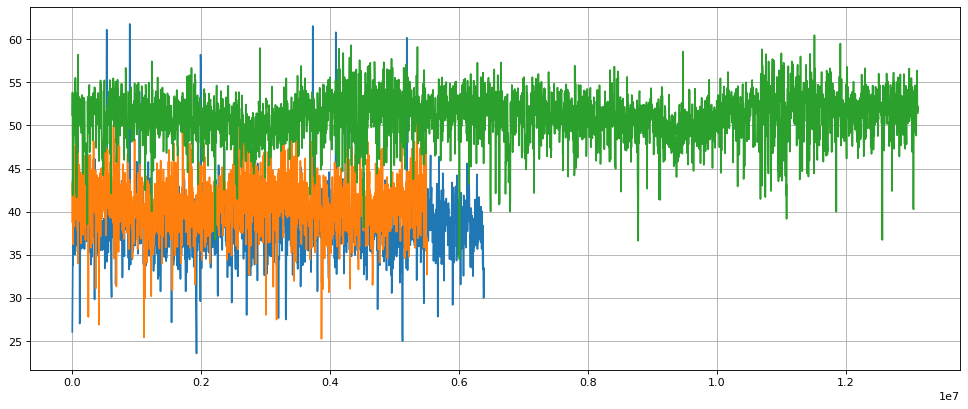

In [52]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(gc['GC_window'], gc['GC_content'])
plt.plot(gc1['GC_window'], gc1['GC_content'])
plt.plot(gc2['GC_window'], gc2['GC_content'])
plt.grid(True)
plt.show();

In [15]:
def tranform_data_frames(filenames, names):
    dfgen = (pd.read_csv(file, 
                         skiprows = 1, 
                         header=None) for file in filenames)
    dfs = []
    for name, df in zip(names, dfgen):
        df = pd.pivot_table(df, columns=[0]).reset_index(drop=True)
        df.insert(0, 'Name', name)
        dfs.append(df)
    df_final = pd.concat(dfs)
    cls = list(df_final.columns)
    cls.append(cls.pop(-2))
    return df_final[cls]    

In [16]:
n = names[:4]

In [17]:
tranform_data_frames(csv_files, n)

0            Name          A          C          G          T         GC
0  Methyloligella   579297.0   988846.0  1069194.0   593457.0  63.700747
0     Xenorhabdus  1200666.0   957193.0   946784.0  1198742.0  44.255063
0   Undibacterium  1469649.0  1521300.0  1521539.0  1471678.0  50.791341

In [24]:
df = tranform_data_frames(filenames, names)

In [25]:
dir_out = os.path.join('Results', 'Basic_stats', 'Final_data')
csv_name = 'Base_stats_all_Plsm.csv'
if not os.path.exists(dir_out):
    os.makedirs(dir_out)
df.to_csv(f'{dir_out}/{csv_name}')

In [ ]:
tranform_data_frames(csv_files, n)

In [ ]:
it = (pd.pivot_table(df[i], columns=[0]).reset_index(drop=True) for i in range(len(df))) 

In [ ]:
dfc = pd.concat(it)

In [ ]:
dfc

In [ ]:
cls = list(dfc.columns)

In [ ]:
cls.append(cls.pop(-2))

In [ ]:
dfc[cls]

In [ ]:
dfs = []
for d, name in zip(it, n):
    d['Name'] = name
    dfs.append(d)   

In [ ]:
dfs

In [ ]:
new_df.set_index('Name')

In [ ]:
df[0].T

In [ ]:
d = df[0].to_dict()

In [ ]:
d

In [ ]:
list(d['counts'].values())

In [ ]:
def get_df_to_dict(df, name):
    d = df.to_dict()
    nucs = list(d[0].values())
    cnts = list(d[1].values())
    dic = dict(zip(nucs, cnts))
    return {name: dic}

In [ ]:
pd.DataFrame.from_dict(get_df_to_dict(df[0], 'Methyloligella'))